# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# formats floating-point numbers to display with three decimal places.
pd.set_option('display.float_format', lambda x: '%.3f' %x)

### Understanding the structure of the data

In [3]:
# Import the drive module from google.colab library
from google.colab import drive

# Mount the Google Drive to the /content/drive directory
drive.mount('/content/drive')


Mounted at /content/drive


**Importing the dataset**

In [4]:
# Read the CSV file from Google Drive into a pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python_learning/project_python_foundation/v01/foodhub_order.csv')

**Bold begin and Bold end charchters to use in print statements.**

In [5]:
# Makes the characters afters this tag bold
bold_begin = '\033[1m'

# Makes the characters afters this tag normal
bold_end = '\033[0m'

**View the first 5 rows of the dataset**

In [6]:
# Display the first five rows of the DataFrame
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [7]:
# Print the number of rows and columns in the DataFrame
print(f'The data has {bold_begin}{data.shape[0]}{bold_end} rows and {bold_begin}{data.shape[1]}{bold_end} columns')

The data has 1898 rows and 9 columns


#### Observations:


The dataset has been loaded properly
- Dataset consists of `1898` rows and `9` columns displaying the various attributes related to each Order.
- The DataFrame contains information about food orders from various restaurants.
- Each row represents a single order, with details such as order ID, customer ID, restaurant name, cuisine type, cost of the order, etc.
- ` day_of_the_week` indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
- Some orders have a given rating, while others do not have a rating (indicated by 'Not given').
- The time taken for food preparation and delivery is provided in the `'food_preparation_time` and `delivery_time` columns, respectively.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [8]:
# Display the concise summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


- The DataFrame contains `1898` entries (rows) and `9` columns.
- Each column has `1898` `non-null` entries, indicating that there are no missing values in the dataset.
- The data types of the columns includes `5 numerical` datatype `int64(4 columns)` for integer values, `float64(1 column)` for floating-point numbers, and `object(4 columns)` for categorical variables (strings).
- `numerical(int64):` order_id, customer_id, food_preparation_time, delivery_time
- `numerical(float64):` cost_of_the_order
- `object(string)`: restaurant_name, cuisine_type, day_of_the_week, rating
- `Rating` is read as object type column, for some operations we may need it in numerical.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [9]:
# Check missing values in each column and sum them up
data.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
- There are no null values in the data.

**The are some values for rating that are 'Not given', I will treat them and will save in another column with the name of "rating_numerical_treated" and will add another column with the name of "rating_numerical" to keep just the numeric values and replace the "Not given" with pd.nan to see if the treatment will have any effect on the correlation or results when the rating is used.**

#### Rating treatment

#####Treatment of the data with the mean of each resturant

In [10]:
# Replace the string "Not given" with NaN and convert the 'rating' column to float type
data['rating_numerical_treated'] = data['rating'].replace("Not given", np.nan).astype(float)

# Fill NaN values in 'rating_numerical_treated' with the mean rating of each restaurant
data['rating_numerical_treated'] = data['rating_numerical_treated'].fillna(value=data.groupby(['restaurant_name'])['rating_numerical_treated'].transform('mean'))
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,rating_numerical_treated
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20,NaN
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23,4.333
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28,5.000
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15,3.000
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24,4.000


###### Observations:
- After treatment with `mean` of each resturant we still have resturants with `"NaN"` value, so we will investigate more to see how many of them have only "Not given" as rating.

#####Checking the data to see how many of them have only 'Not given' as the rating value.

In [11]:
# Calculate the number of 'Not given' ratings for each restaurant and sort in descending order
sum_of_not_given = data.groupby(['restaurant_name'])['rating'].apply(lambda x: (x == 'Not given').sum()).sort_values(ascending=False)

# Calculate the number of given ratings (not 'Not given') for each restaurant and sort in descending order
sum_of_given = data.groupby(['restaurant_name'])['rating'].apply(lambda x: (x != 'Not given').sum()).sort_values(ascending=False)

# Create a DataFrame from the sums of 'Not given' and given ratings and sort by 'sum_of_not_given' in descending order
restaurant_ratings_summary_df = pd.DataFrame({'sum_of_not_given': sum_of_not_given, 'sum_of_given': sum_of_given}).sort_values(by='sum_of_not_given', ascending=False).copy()

# Filter the DataFrame to keep only rows where the number of given ratings is zero
restaurant_ratings_summary_df_filtered  = restaurant_ratings_summary_df[restaurant_ratings_summary_df['sum_of_given'] == 0]

# Print the number of orders in these restaurants
print(f"Number of orders from restaurants their rating has only {bold_begin}Not given{bold_end} is : {bold_begin}{restaurant_ratings_summary_df_filtered['sum_of_not_given'].sum() }{bold_end}")

# Print the list of restaurants with zero given ratings
print(restaurant_ratings_summary_df_filtered.reset_index() )




Number of orders from restaurants their rating has only Not given is : 30
                 restaurant_name  sum_of_not_given  sum_of_given
0                   Room Service                 3             0
1             Friend of a Farmer                 3             0
2                        Hangawi                 2             0
3                       Bistango                 2             0
4                         Aurora                 2             0
5   Tarallucci e Vino Restaurant                 2             0
6                 Paul & Jimmy's                 1             0
7                        Wa Jeal                 1             0
8                      Rohm Thai                 1             0
9                     Spice Thai                 1             0
10                         Posto                 1             0
11                 Lamarca Pasta                 1             0
12             Gaia Italian Cafe                 1             0
13              

##### Observations
- There are `22` restaurants that has only `Not given` as rating and they have `30` orders in total.
- These restaurants are a small portion of all orders so will keep them as they are.

##### Adding a new column with the name of `rating_numerical` to just replace the `Not given` values with `NaN` and cast the type to `float`.


In [12]:
# Replace the string "Not given" with NaN and convert the 'rating' column to float type
data['rating_numerical'] = data['rating'].replace("Not given", np.nan).astype(float)

#####Comapre data with treatment and without treatment

In [13]:
# Describe the statistics for 'rating_numerical' and 'rating_numerical_treated' columns
data[['rating_numerical', 'rating_numerical_treated']].describe().T

,count,mean,std,min,25%,50%,75%,max
rating_numerical,1162.000,4.344,0.741,3.000,4.000,5.000,5.000,5.000
rating_numerical_treated,1868.000,4.349,0.611,3.000,4.000,4.328,5.000,5.000


##### Observations
- As the table shows the changes are:  `mean: from 4.344 to 4.349`, `std: from 0.741 to 0.611` `50% from 5.000 to 4.328`


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [14]:
# Generate descriptive statistics for all columns in the DataFrame
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.000,NaN,NaN,NaN,1477495.500,548.050,1476547.000,1477021.250,1477495.500,1477969.750,1478444.000
customer_id,1898.000,NaN,NaN,NaN,171168.478,113698.140,1311.000,77787.750,128600.000,270525.000,405334.000
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.000,NaN,NaN,NaN,16.499,7.484,4.470,12.080,14.140,22.297,35.410
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.000,NaN,NaN,NaN,27.372,4.632,20.000,23.000,27.000,31.000,35.000
delivery_time,1898.000,NaN,NaN,NaN,24.162,4.973,15.000,20.000,25.000,28.000,33.000
rating_numerical_treated,1868.000,NaN,NaN,NaN,4.349,0.611,3.000,4.000,4.328,5.000,5.000


**Minimum, average, and maximum time it takes for food to be prepared once an order is placed**

In [15]:
# Print the minimum, average, and maximum food preparation time
print(f"For the 'food_prepration_time' {bold_begin}Minimum{bold_end} is {bold_begin}{data['food_preparation_time'].min()}{bold_end} minutes, {bold_begin}Average{bold_end} is {bold_begin}{data['food_preparation_time'].mean():.2f}{bold_end} minutes and the {bold_begin}Maximum {bold_end}is {bold_begin}{data['food_preparation_time'].max()}{bold_end} minutes takes for food to be prepared once an order is placed.")

# Print the descriptive statistics for the 'food_preparation_time' column
print(data['food_preparation_time'].describe())

For the 'food_prepration_time' Minimum is 20 minutes, Average is 27.37 minutes and the Maximum is 35 minutes takes for food to be prepared once an order is placed.
count   1898.000
mean      27.372
std        4.632
min       20.000
25%       23.000
50%       27.000
75%       31.000
max       35.000
Name: food_preparation_time, dtype: float64


#### Observations:
* For the `food prepration time` minimum is 20 minutes, average is arround 27 minutes , and maximum is 35 minutes. There is not a huge difference between the minimum value and 25% percentile ,and the maximum value and  75% percentile of the data which indicates there might be no outliers present in this column.
* `resturant_name:` There are 178 unique resturants in this data set, the top one is "Shake Shack" resturant with frequency of 219.
* `cuisine_type`: There are 14 unique cuisine types in this data set. "American" cusine is the top cuisine which was ordered with frequency of 584.
* `cost_of_the_order`: On average the orders are \$16.49, and the median is \$14.14, which is slightly lower than the mean. There is a standard deviation of $7.48, indicating a moderate spread in costs around the average.
The minimum cost is \$4.47, and the maximum cost is \$35.41. This wide range highlights the significant variation in order prices.There is not a huge difference between the minimum value and 25% percentile ,and the maximum value and 75% percentile of the data which indicates there might be no outliers present in this column.
* `day_of_the_week`: Most of the orders was made on weekends with frequency of the 1351.
* `rating`: We have 4 unique values for rating, and the top one is "Not given" with frequency of 736.
* `rating_numerical_treated`: The average is 4.349.
* `delivery_time`: minimum is 15 minutes,average is arround  24 minutes , and maximum is 33 minutes. There is not a huge difference between the minimum value and 25% percentile ,and the maximum value and 75% percentile of the data which indicates there might be no outliers present in this column.

### **Question 5:** How many orders are not rated? [1 mark]

In [16]:
# Count the number of orders with the rating as 'Not given' with dropna=False to keep na values if there is any
not_given = data['rating'].value_counts(dropna=False)['Not given']

# Print separator Rating count
print('-'*17, 'Rating Count', '_'*17)

# Print counts of different ratings with dropna=False to print na values if there is any
print(data['rating'].value_counts(dropna=False))

# Print separator Percentage
print('-'*17, 'Percentage', '_'*17)

# Print percentage of different ratings with dropna=False to print na values if there is any
print(data['rating'].value_counts(dropna=False, normalize=True)*100)

# Print separator
print('-'*35)

# Print the count of orders with 'Not given' rating
print(f"There are {bold_begin}{not_given}{bold_end} orders with the rating as {bold_begin}Not given{bold_end} or in oder word they are {bold_begin}not RATED!{bold_end}")

----------------- Rating Count _________________
rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64
----------------- Percentage _________________
rating
Not given   38.778
5           30.980
4           20.337
3            9.905
Name: proportion, dtype: float64
-----------------------------------
There are 736 orders with the rating as Not given or in oder word they are not RATED!


#### Observations:
* There are `736` orders with the rating as `Not given`, in other word there are `736` orders that are not rated!
* We have four ratings `Not given`, `5`, `4` and `3`. There is no ratings unders `3`.
* After `Not given` the top rating is `5` which shows satisfactory.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

**List of columns**

In [17]:
# Initialize an empty string to hold the formatted column names
column_names_print = ''
# Iterate over each column name in the DataFrame
for x in data.columns:
    # Append the formatted column name to the string
    # {x:>25} formats the column name to be right-aligned with a width of 25 characters
    # {bold_begin} and {bold_end} are used to make the text bold
  column_names_print +=f"{bold_begin}{x:>25}{bold_end}\n"
  # Print the formatted column names
print(column_names_print)

                 order_id
              customer_id
          restaurant_name
             cuisine_type
        cost_of_the_order
          day_of_the_week
                   rating
    food_preparation_time
            delivery_time
 rating_numerical_treated
         rating_numerical



#### Order ID

In [18]:
# Counting the number of unique order IDs
unique_order_ids = data['order_id'].nunique()
# Printing the count of unique order IDs
print(f"There are {bold_begin}{unique_order_ids}{bold_end} unique order IDs.")

# Counting the number of duplicate order IDs
duplicate_order_ids = data['order_id'].duplicated().sum()
# Printing the count of duplicate order IDs
print(f"There is {bold_begin}No('{duplicate_order_ids}'){bold_end} duplicate order IDs.")


There are 1898 unique order IDs.
There is No('0') duplicate order IDs.


##### Observations:
- There is no duplicate value for the `order_id` in this dataset.
- There is no missing value for the `order_id` in this dataset.

#### Customer ID

In [19]:
# Counting the number of unique customer IDs
unique_customers = data['customer_id'].nunique()
# Printing the count of unique customer IDs with bold formatting
print(f"There are {bold_begin}{unique_customers}{bold_end} unique customers")

There are 1200 unique customers


**By counting the number of each customer's id we can see the number of orders each customer placed.**

In [20]:
# Dataframe for count number of orders made by each customer
df_customers_order_count = data.groupby('customer_id').size().to_frame(name= 'count').sort_values(by = 'count', ascending = False).reset_index()

# Count customers who has more than one order
customers_order_count_gt_1 = df_customers_order_count[df_customers_order_count['count']>1]

# Count customers who has one order
customers_order_count_eq_1 = df_customers_order_count[df_customers_order_count['count']==1]

# Print number of customers with one order and more than one order and the number of orders for top 5 customers
print(f'There are {bold_begin}{customers_order_count_eq_1.shape[0] }{bold_end} customers with one order and {bold_begin}{customers_order_count_gt_1.shape[0]}{bold_end} customers with more than one order and the top 5 are:\n {bold_begin}{customers_order_count_gt_1.head()}{bold_end}')

There are 784 customers with one order and 416 customers with more than one order and the top 5 are:
    customer_id  count
0        52832     13
1        47440     10
2        83287      9
3       250494      8
4        65009      7


**Plot for number of orders by users**

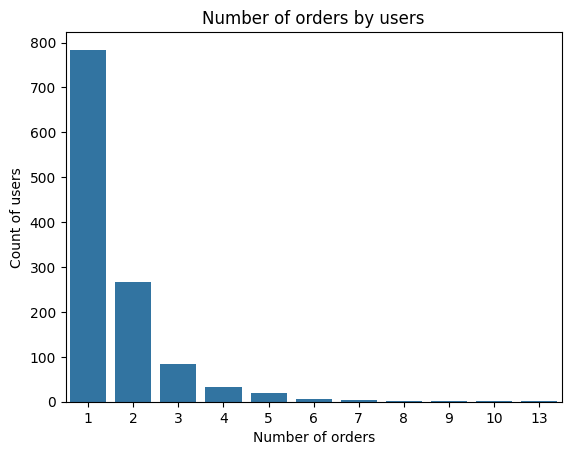

In [21]:
# Creating a countplot with 'count' on the x-axis and data from df_customers_order_count
sns.countplot(x='count', data=df_customers_order_count)

# Adding a title to the plot
plt.title('Number of orders by users')

# Adding labels to the x and y axes
plt.xlabel('Number of orders')
plt.ylabel('Count of users')

# Displaying the plot
plt.show()

##### Observations:
- There are `1200` unique customers in this dataset.
- There are `416` customers with more than one order and `784` customers with one order. It shows most of the users use this app just one time.
- The user with the most orders has `13` orders.

#### Restaurant name

In [22]:
# Number of unique resturants
print(f"There are {bold_begin}{data['restaurant_name'].nunique()}{bold_end} unique resturants.")

# Print the statistical info for the resturant names column
print(data['restaurant_name'].describe())

There are 178 unique resturants.
count            1898
unique            178
top       Shake Shack
freq              219
Name: restaurant_name, dtype: object


**By counting the number of each resturant's id we can see the number of orders for each resturant.**

In [23]:
# Dataframe of number of orders for each resturant
df_resturant_order_count = data.groupby('restaurant_name').size().to_frame(name= 'count').sort_values(by = 'count', ascending = False).reset_index()

# print top 5 resturants based on their orders
print(f'The top {bold_begin}5{bold_end} resturants are:\n {df_resturant_order_count.head()}')

The top 5 resturants are:
              restaurant_name  count
0                Shake Shack    219
1          The Meatball Shop    132
2          Blue Ribbon Sushi    119
3  Blue Ribbon Fried Chicken     96
4                       Parm     68


**Plot for top 5 resturants based on their orders.**

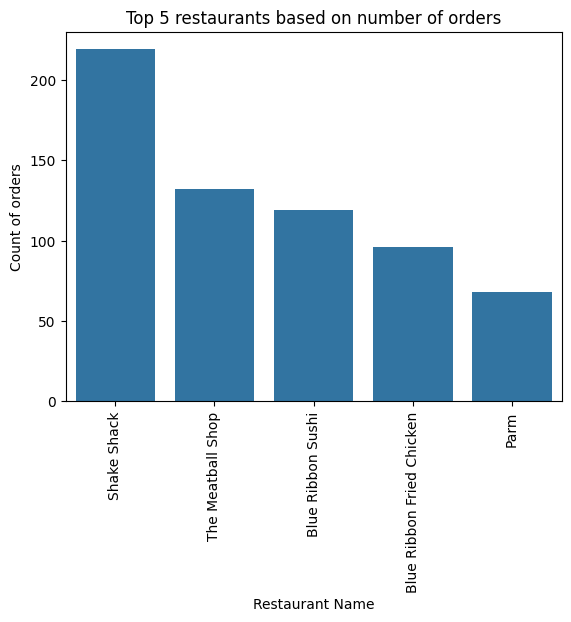

In [24]:
# Plot of top 5 resturants

# Creating a barplot with 'restaurant_name' on the x-axis, 'count' on the y-axis, and data from the first five rows of df_resturant_order_count
sns.barplot(x='restaurant_name', y='count', data=df_resturant_order_count.head())

# Adding a title to the plot
plt.title('Top 5 restaurants based on number of orders')

# Adding labels to the x and y axes
plt.xlabel('Restaurant Name')
plt.ylabel('Count of orders')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=90)

# Displaying the plot
plt.show()

**Percentage of top 5 resturants to all resturants**

In [25]:
# Percentage of top 5 resturants to all resturants
top_5_rest_percent = (df_resturant_order_count.head(5)['count'].sum() / df_resturant_order_count['count'].sum()) * 100
print(f"The top {bold_begin}5{bold_end} resturants have {bold_begin}{top_5_rest_percent:.2f}%{bold_end} of all orders.")


The top 5 resturants have 33.40% of all orders.


##### Observations:
- There are `178` unique resturants in this dataset.
- The top resturant based on the number of orders is `Shake Shack` with `219` orders.
- Top `5` resturants have `33.40%` of all orders.

#### Cuisine type

**Number of unique cuisines**

In [26]:
# Number of unique cuisines
print(f"There are {bold_begin}{data['cuisine_type'].nunique()}{bold_end} unique Cuisines:")

# Print the statistical info for the cuisines column
print(data['cuisine_type'].describe())

There are 14 unique Cuisines:
count         1898
unique          14
top       American
freq           584
Name: cuisine_type, dtype: object


**Popularity of cuisines**

In [27]:
# Popularity of cuisines
print(data['cuisine_type'].value_counts())

cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64


**Bar plot of cusines based on their popularity plot**

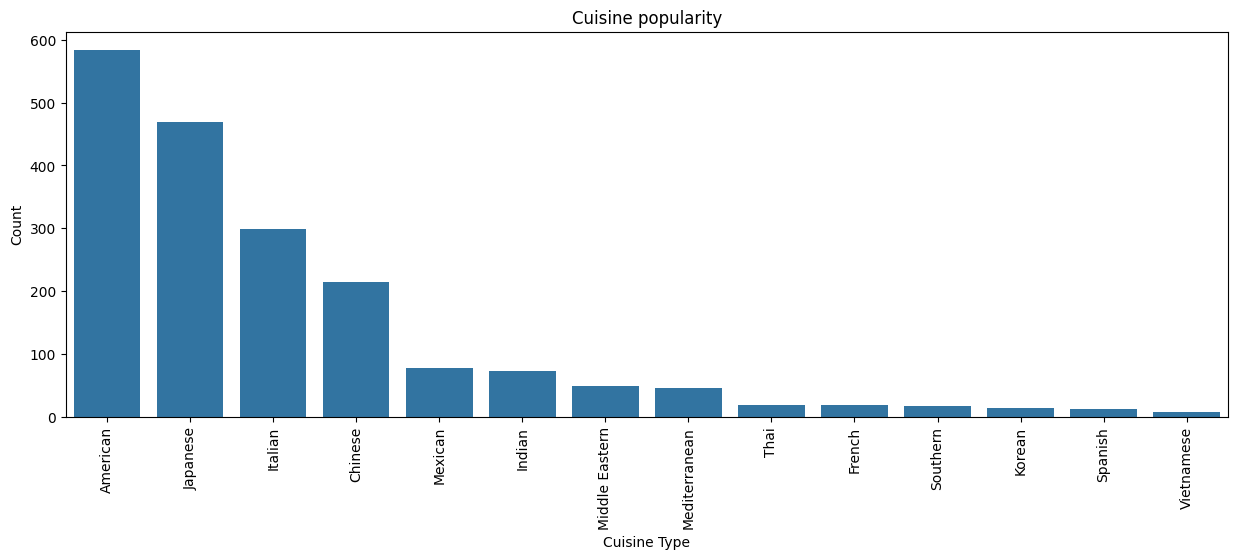

In [28]:
# Bar plot of cusines based on their popularity plot
# Setting the size of the figure
plt.figure(figsize=(15, 5))

# Creating a barplot with cuisine types on the x-axis and their respective counts on the y-axis
sns.barplot(x=data['cuisine_type'].value_counts().index, y=data['cuisine_type'].value_counts().values)

# Adding a title to the plot
plt.title('Cuisine popularity')

# Adding labels to the x and y axes
plt.xlabel('Cuisine Type')
plt.ylabel('Count')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=90)

# Displaying the plot
plt.show()

**Top 5 popular cuisines**

In [29]:
# Top 5 popular cuisines
top_five_cuisines = data['cuisine_type'].value_counts().sort_values(ascending=False).head()
print(f'The top 5 popular cuisines are:\n {top_five_cuisines}')

The top 5 popular cuisines are:
 cuisine_type
American    584
Japanese    470
Italian     298
Chinese     215
Mexican      77
Name: count, dtype: int64


**Percentage of all cusines based on the number of orders**

In [30]:
# Print percentage of all cusines based on the number of orders
print(data['cuisine_type'].value_counts(normalize=True))

cuisine_type
American         0.308
Japanese         0.248
Italian          0.157
Chinese          0.113
Mexican          0.041
Indian           0.038
Middle Eastern   0.026
Mediterranean    0.024
Thai             0.010
French           0.009
Southern         0.009
Korean           0.007
Spanish          0.006
Vietnamese       0.004
Name: proportion, dtype: float64


Percentage of top 5 cuisines to all

In [31]:
# Percentage of top 5 cuisines to all
print(f"Percentage of top {bold_begin}5{bold_end} cuisines to all: {bold_begin}{round(top_five_cuisines.sum() / data['cuisine_type'].value_counts().sum() * 100, 2)}%{bold_end}")


Percentage of top 5 cuisines to all: 86.62%


**Top 5 cuisines plot**

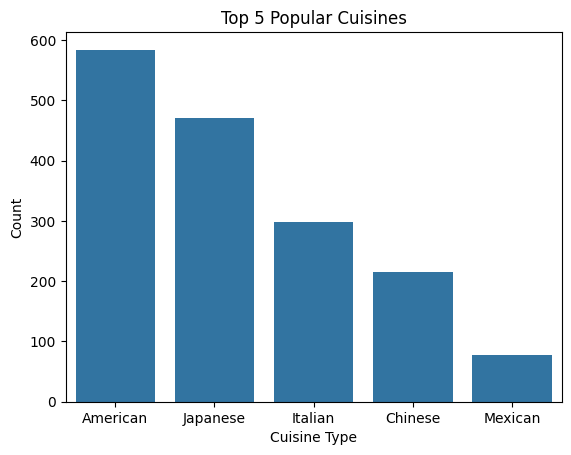

In [32]:
# Top 5 cuisines plot

# Creating a barplot with cuisine types on the x-axis and their respective counts on the y-axis
sns.barplot(x=top_five_cuisines.index, y=top_five_cuisines.values)

# Adding a title to the plot
plt.title('Top 5 Popular Cuisines')

# Adding labels to the x and y axes
plt.xlabel('Cuisine Type')
plt.ylabel('Count')

# Displaying the plot
plt.show()


##### Observations:
- There are `14` unique cuisines in this dataset.
- The most popular cuisine is `American` with `584` orders followed by `Japanese` with `470` orders.
- Top five cuisines has the `86.62%` of all cusines

#### Cost of the order

**Statistical info for the cost_of_the_order column**

In [33]:
# Print the statistical info for the cost_of_the_order column
print(data['cost_of_the_order'].describe())

count   1898.000
mean      16.499
std        7.484
min        4.470
25%       12.080
50%       14.140
75%       22.297
max       35.410
Name: cost_of_the_order, dtype: float64


**Cost of orders hist plot**

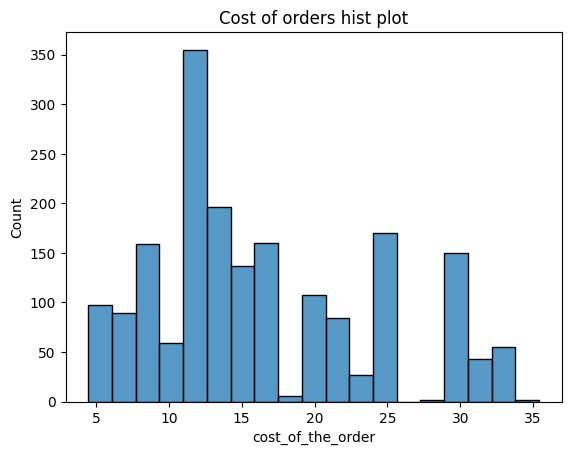

In [34]:
# Cost of orders hist plot

# Setting the title of the plot
plt.title('Cost of orders hist plot')

# Creating a histogram plot of the 'cost_of_the_order' column in the data
sns.histplot(data=data, x='cost_of_the_order')

# Displaying the plot
plt.show()

**Cost of orders box plot**

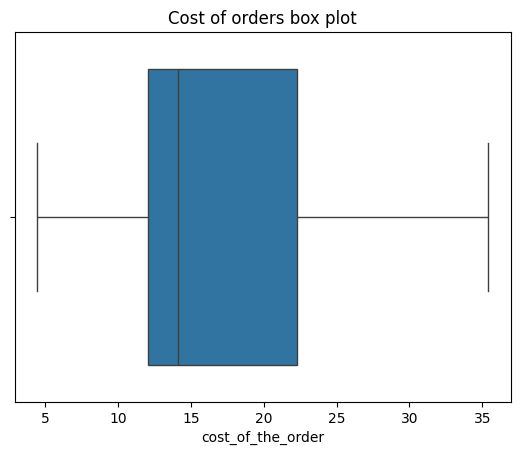

In [35]:
# Cost of orders box plot
# Setting the title of the plot
plt.title('Cost of orders box plot')

# Creating a box plot of the 'cost_of_the_order' column in the data
sns.boxplot(data=data, x='cost_of_the_order')

# Displaying the plot
plt.show()

**Cost of orders density plot**

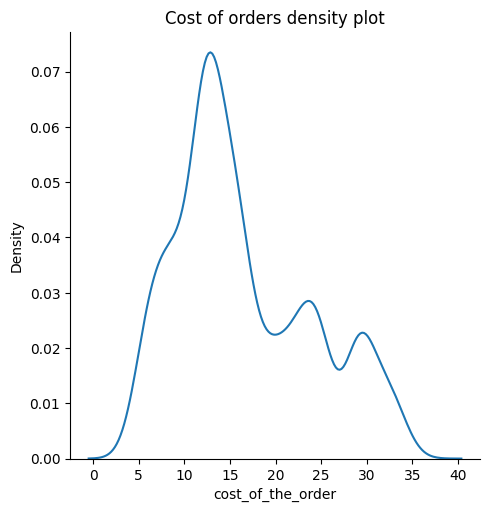

In [36]:
# Cost of orders density plot
# Creating a kernel density estimation plot of the 'cost_of_the_order' column in the data
sns.displot(data=data, x=data['cost_of_the_order'], kind='kde')

# Setting the title of the plot
plt.title('Cost of orders density plot')

# Displaying the plot
plt.show()

##### Observations:
- The distribution of the cost of the order is right skewed.
- There are no outliers for the cost of the order.

#### Day of the week

**Count the number of orders for each day of the week**

In [37]:
# Count the number of orders for each day of the week
day_counts = data['day_of_the_week'].value_counts()

# Print the counts
print(day_counts)

day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64


**Percentage of orders in day of the week**

In [38]:
# Print percentage of orders in day of the week
print(data['day_of_the_week'].value_counts(normalize=True))

day_of_the_week
Weekend   0.712
Weekday   0.288
Name: proportion, dtype: float64


**Day of the week the week count plot**

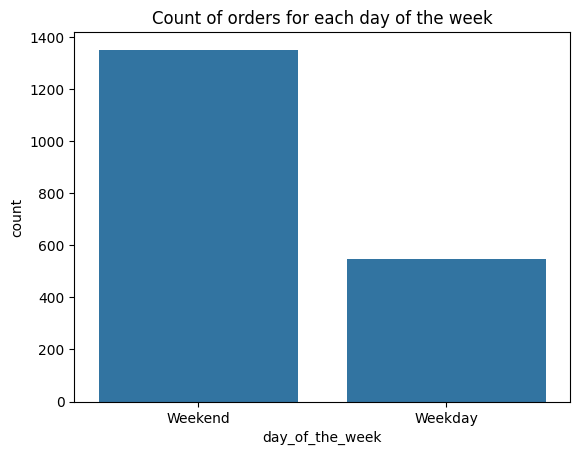

In [39]:
# Day of the week the week count plot
# Creating a countplot of the 'day_of_the_week' column in the data
sns.countplot(data=data, x='day_of_the_week')

# Setting the title of the plot
plt.title('Count of orders for each day of the week')

# Displaying the plot
plt.show()


##### Observations:
- Most of the orders(around 71%) are for weekend with frequency of 1351.

#### Rating

**Count the number of orders for each rating category**

In [40]:
# Count the number of orders for each rating category
rating_counts = data['rating'].value_counts()

# Print the counts
print(rating_counts)


rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64


**Percentage of each rating**

In [41]:
# Percentage of each rating
print(data['rating'].value_counts(normalize=True))

rating
Not given   0.388
5           0.310
4           0.203
3           0.099
Name: proportion, dtype: float64


**Count plot of ratings column**

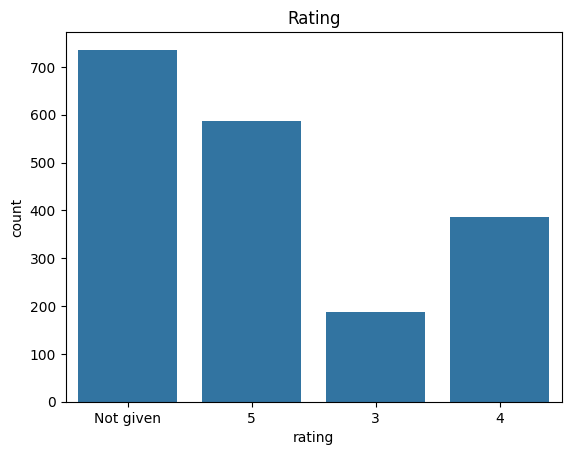

In [42]:
# Count plot of ratings column
# Creating a countplot of the 'rating' column in the data
sns.countplot(data=data, x='rating')

# Setting the title of the plot
plt.title('Rating')

# Displaying the plot
plt.show()

##### Observations:
- Most of the orders are not rated around `38%` of orders.
- The second most rate is 5 around `31%` of orders

#### Rating Numerical Treated


**Descriptive statistics for the column 'rating_numerical_treated'**

In [43]:
# Print descriptive statistics for the column 'rating_numerical_treated'
print(data['rating_numerical_treated'].describe())

count   1868.000
mean       4.349
std        0.611
min        3.000
25%        4.000
50%        4.328
75%        5.000
max        5.000
Name: rating_numerical_treated, dtype: float64


**Rating numerical treated hist plot**

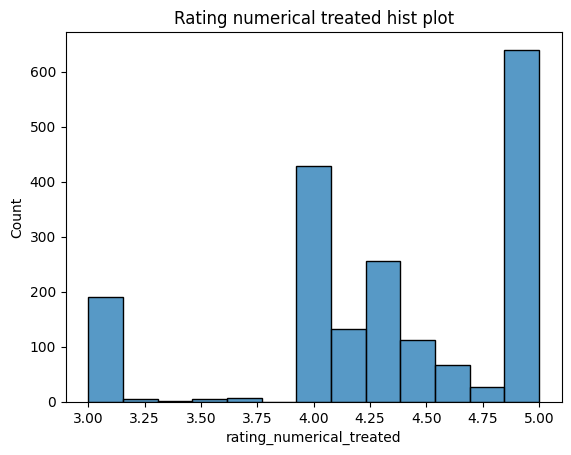

In [44]:
# Setting the title of the plot
plt.title('Rating numerical treated hist plot')

# Creating a histogram plot of the 'rating_numerical_treated' column in the data
sns.histplot(data=data, x='rating_numerical_treated')

# Displaying the plot
plt.show()

**Rating numerical treated box plot**

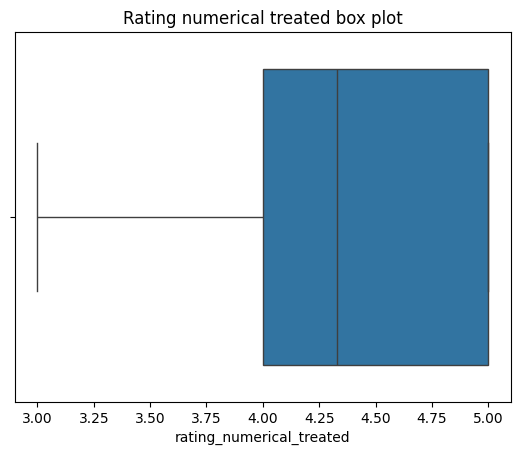

In [45]:
# Setting the title of the plot
plt.title('Rating numerical treated box plot')

# Creating a box plot of the 'rating_numerical_treated' column in the data
sns.boxplot(data=data, x='rating_numerical_treated')

# Displaying the plot
plt.show()

**Kernel density estimation plot of the 'rating_numerical_treated'**

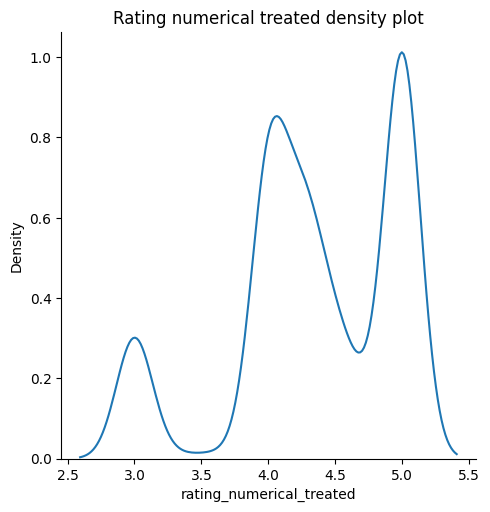

In [46]:
# Creating a kernel density estimation plot of the 'rating_numerical_treated' column in the data
sns.displot(data=data, x=data['rating_numerical_treated'], kind='kde')

# Setting the title of the plot
plt.title('Rating numerical treated density plot')

# Displaying the plot
plt.show()

##### Observations:
- The rating_numerical_treated is left skewed.
- After treatment max from `Not given` changed to `5`.

#### Food prepration time

**statistical info for the food prepration time column**

In [47]:
# Print the statistical info for the food prepration time column
print(data['food_preparation_time'].describe())

count   1898.000
mean      27.372
std        4.632
min       20.000
25%       23.000
50%       27.000
75%       31.000
max       35.000
Name: food_preparation_time, dtype: float64


**Food prepration time hist plot**

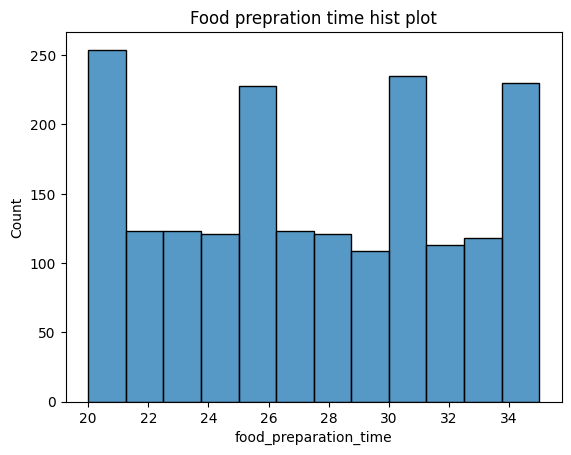

In [48]:
# Food prepration time hist plot

# Creating a histogram plot of the 'food_preparation_time' column in the data
sns.histplot(data=data,x='food_preparation_time')

# Set the title for the histogram plot
plt.title('Food prepration time hist plot')

# Display the plot
plt.show()

**Food prepration time box plot**

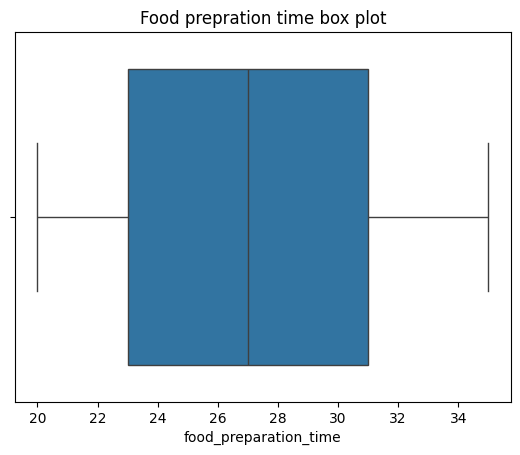

In [49]:
# Food prepration time box plot

# Creating a box plot of the 'food_preparation_time' column in the data
sns.boxplot(data=data,x='food_preparation_time')

# Setting the title of the plot
plt.title('Food prepration time box plot')

# Displaying the plot
plt.show()

**Food prepration time density plot**

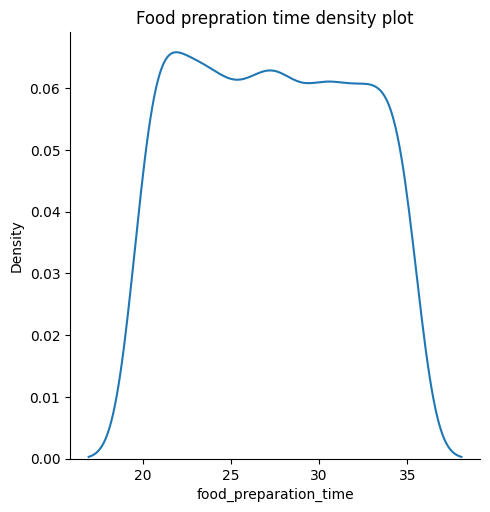

In [50]:
# Food prepration time density plot
# Creating a kernel density estimation plot of the 'food_preparation_time' column in the data
sns.displot(data=data,x=data['food_preparation_time'],kind='kde')

# Setting the title of the plot
plt.title('Food prepration time density plot')

# Displaying the plot
plt.show()

##### Observations:
- The average and the median are too close.
- There are no outliers

#### Delivery time

**Statistical info for the Delivery time column**

In [51]:
# Print the statistical info for the Delivery time column
print(data['delivery_time'].describe())

count   1898.000
mean      24.162
std        4.973
min       15.000
25%       20.000
50%       25.000
75%       28.000
max       33.000
Name: delivery_time, dtype: float64


**Hist plot of the delivery time**

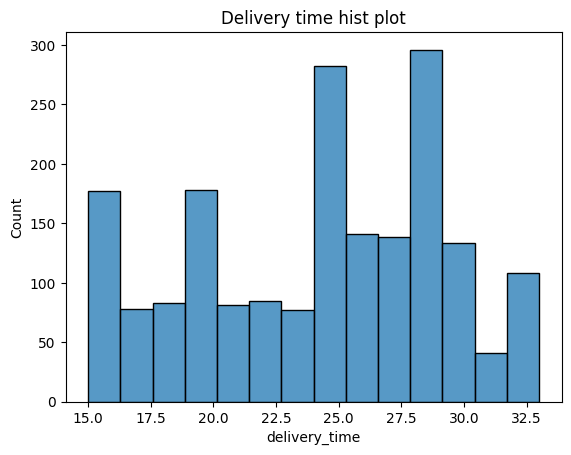

In [52]:
# Hist plot of the delivery time
# Creating a histogram plot of the 'delivery_time' column in the data
sns.histplot(data=data, x='delivery_time')

# Setting the title of the plot
plt.title('Delivery time hist plot')

# Displaying the plot
plt.show()

**Box plot of the delivery time**

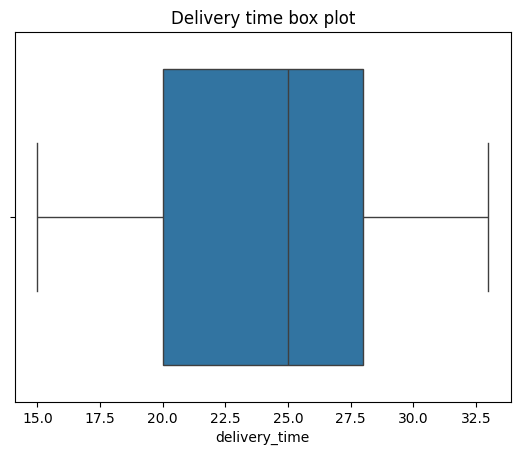

In [53]:
# Box plot of the delivery time
# Setting the title of the plot
plt.title('Delivery time box plot')

# Creating a box plot of the 'delivery_time' column in the data
sns.boxplot(data=data, x='delivery_time')

# Saving the plot as a JPEG file with tight bounding box
plt.savefig("output.jpg", bbox_inches='tight')

# Displaying the plot
plt.show()

**Density plot of the delivery time**

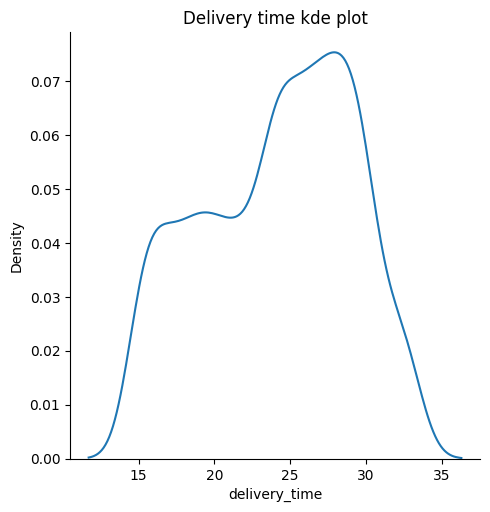

In [54]:
# Density plot of the delivery time
# Creating a kernel density estimation plot of the 'delivery_time' column in the data
sns.displot(data=data, x=data['delivery_time'], kind='kde')

# Setting the title of the plot
plt.title('Delivery time kde plot')

# Displaying the plot
plt.show()

##### Observations:
- The Max delivery time is 33 minutes.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [55]:
# Calculate the frequency of each restaurant name in the dataset and select the top five
top_five_resturant_names = data['restaurant_name'].value_counts().sort_values(ascending=False).head().index

# Filter the original dataset to include only rows where the restaurant name belongs to the top five
data_top_five_resturants = data[data.restaurant_name.isin(top_five_resturant_names)]

# Print the names of the top five restaurants along with the number of orders they received
print(f'The top {bold_begin}5{bold_end} restaurants are:\n {data_top_five_resturants.restaurant_name.value_counts().to_frame(name="Number of orders").reset_index()}\n\n')


The top 5 restaurants are:
              restaurant_name  Number of orders
0                Shake Shack               219
1          The Meatball Shop               132
2          Blue Ribbon Sushi               119
3  Blue Ribbon Fried Chicken                96
4                       Parm                68




**Disply the count plot of top 5 resturants**

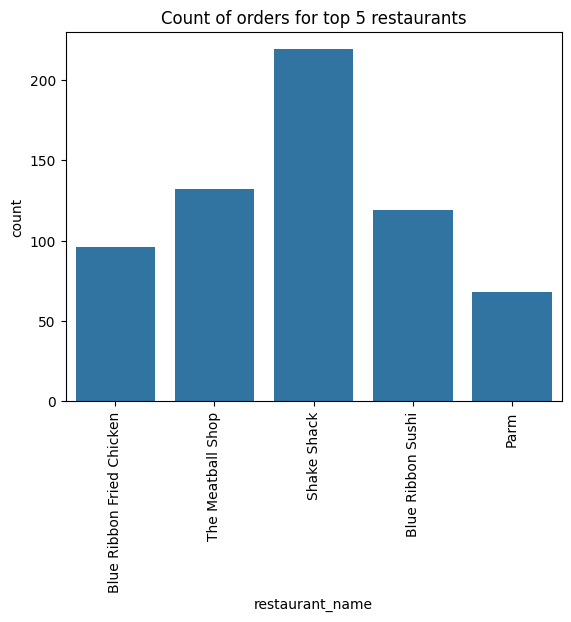

In [56]:
# Disply the count plot of top 5 resturants
# Creating a countplot of the 'restaurant_name' column in the data_top_five_restaurants DataFrame
sns.countplot(data=data_top_five_resturants, x='restaurant_name')

# Setting the title of the plot
plt.title('Count of orders for top 5 restaurants')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=90)

# Displaying the plot
plt.show()

**Percentage of top 5 resturants to all**

In [57]:
# Percentage of top 5 resturants to all

# Calculate the total number of orders
total_orders = data.shape[0]

# Calculate the number of orders for the top 5 restaurants
top_5_orders = data_top_five_resturants.shape[0]

# Calculate the percentage
percentage = (top_5_orders / total_orders) * 100

# Print percentage of top 5 resturants to all
print(f"The top 5 restaurants account for {bold_begin}{percentage:.2f}{bold_end}% of all orders.")


The top 5 restaurants account for 33.40% of all orders.


####Observations
- The top 5 resturants are: `Shake Shack`, `The Meatball Shop`, `Blue Ribbon Sushi`, `Blue Ribbon Fried Chicken` and `Parm`
- Top `5` resturants have the `33.40%` of all orders.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [58]:
# Group the data by 'day_of_the_week' and 'cuisine_type', then count the occurrences of each cuisine type on weekends
weekend_cuisine_types = data.groupby('day_of_the_week')['cuisine_type'].value_counts()['Weekend'].sort_values(ascending=False)

# Print the most popular cuisine on weekends along with the number of orders for that cuisine
print(f'The most popular cuisine on weekends is {bold_begin}{weekend_cuisine_types.index[0]}{bold_end} with {bold_begin}{weekend_cuisine_types[0]}{bold_end}  orders')

# Create a DataFrame containing the count of orders for each cuisine type on weekends
weekend_cuisine_types_frame_to_print = data.groupby('day_of_the_week')['cuisine_type'].value_counts()['Weekend'].to_frame(name='Count of orders').reset_index().rename(columns={'cuisine_type':'cuisine type'})

# Print the list of cuisines ordered on weekends
print(f"The list of cuisines ordered in weekend are:\n {weekend_cuisine_types_frame_to_print}")


The most popular cuisine on weekends is American with 415  orders
The list of cuisines ordered in weekend are:
       cuisine type  Count of orders
0         American              415
1         Japanese              335
2          Italian              207
3          Chinese              163
4          Mexican               53
5           Indian               49
6   Middle Eastern               32
7    Mediterranean               32
8             Thai               15
9           French               13
10          Korean               11
11        Southern               11
12         Spanish               11
13      Vietnamese                4


In [59]:
# Percentage of the top cusine tuype to all
# Extract the count of orders for the top cuisine type from the DataFrame
top_cuisine_count = weekend_cuisine_types_frame_to_print.iloc[0]['Count of orders']

# Calculate the total number of orders for all cuisine types on weekends
total_orders = weekend_cuisine_types_frame_to_print['Count of orders'].sum()

# Calculate the percentage of orders represented by the top cuisine type
percentage = (top_cuisine_count / total_orders) * 100

# Print the percentage of orders represented by the top cuisine type on weekends
print(f"The top cuisine type accounts for {bold_begin}{percentage:.2f}%{bold_end} of all orders on weekends.")

The top cuisine type accounts for 30.72% of all orders on weekends.


#### Observations:
`American` is the most popular cusine on weekends with `415` orders and it is around 30% of all orders.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [60]:
# Filter the dataset to include only orders where the cost exceeds 20 dollars
order_cost_gt_20 = data[data['cost_of_the_order'] > 20]

# Print the number of orders that cost above 20 dollars
print(f"Total number of orders that cost above ${bold_begin}20{bold_end} dollars is: {bold_begin}{order_cost_gt_20.shape[0]}{bold_end}", )

# Calculate and print the percentage of orders that cost above 20 dollars relative to the total number of orders
print(f"Percentage of orders above ${bold_begin}20{bold_end} dollars: {bold_begin}{round((order_cost_gt_20.shape[0]/data.shape[0])*100, 2)}%{bold_end}")

Total number of orders that cost above $20 dollars is: 555
Percentage of orders above $20 dollars: 29.24%


#### Observations:
- Total number of orders that cost above $20 dollars is: 555
- Percentage of orders above 20 dollars: 29.24%

### **Question 10**: What is the mean order delivery time? [1 mark]

In [61]:
# Calculate the mean delivery time
mean_del_time = data["delivery_time"].mean()

# Print the mean order delivery time with bold formatting
print(f'The mean order delivery time is {bold_begin}{round(mean_del_time, 2)}{bold_end} minutes')

The mean order delivery time is 24.16 minutes


#### Observations:
- The average delivery time is 24.16

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [62]:
# Create a DataFrame with the count of orders for each customer ID, select the top three customers, and reset the index
df_top_three_customers = data['customer_id'].value_counts().sort_values(ascending=False).head(3).to_frame(name='Number_of_orders').reset_index()

# Rename the columns to 'customer_id' and 'Number_of_orders'
df_top_three_customers.rename(columns={'index':'customer_id'}, inplace=True)

# Print the list of the top 3 most frequent customers with the number of orders they placed
print(f'List of top 3 most frequent customers with the number of orders they placed:\n {df_top_three_customers}')

List of top 3 most frequent customers with the number of orders they placed:
    customer_id  Number_of_orders
0        52832                13
1        47440                10
2        83287                 9


#### Observations:
- Top 3 most frequent customers customer_id's are `52832` with `13` orders, `47440` with `10` orders and `83287` with `9` orders.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [63]:
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,rating_numerical_treated,rating_numerical
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20,NaN,NaN
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23,4.333,NaN
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28,5.000,5.000
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15,3.000,3.000
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24,4.000,4.000


#### Correlation among variables

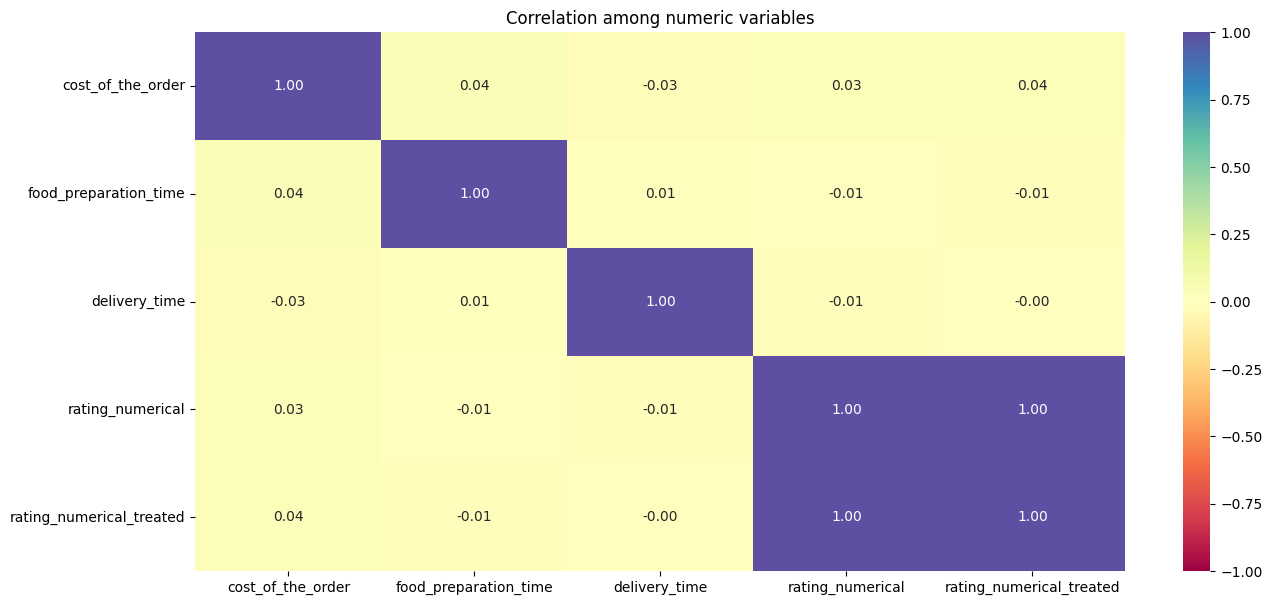

In [64]:
# Select only numeric columns
df_numeric = data[['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating_numerical', 'rating_numerical_treated']]

# Create a heatmap of correlations between numeric columns
plt.figure(figsize=(15, 7))
plt.title("Correlation among numeric variables")
sns.heatmap(df_numeric.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#####Observations
- With the heatmap plot of numeric values, we see no correlation between values.

#### Cuisine vs Cost of the order

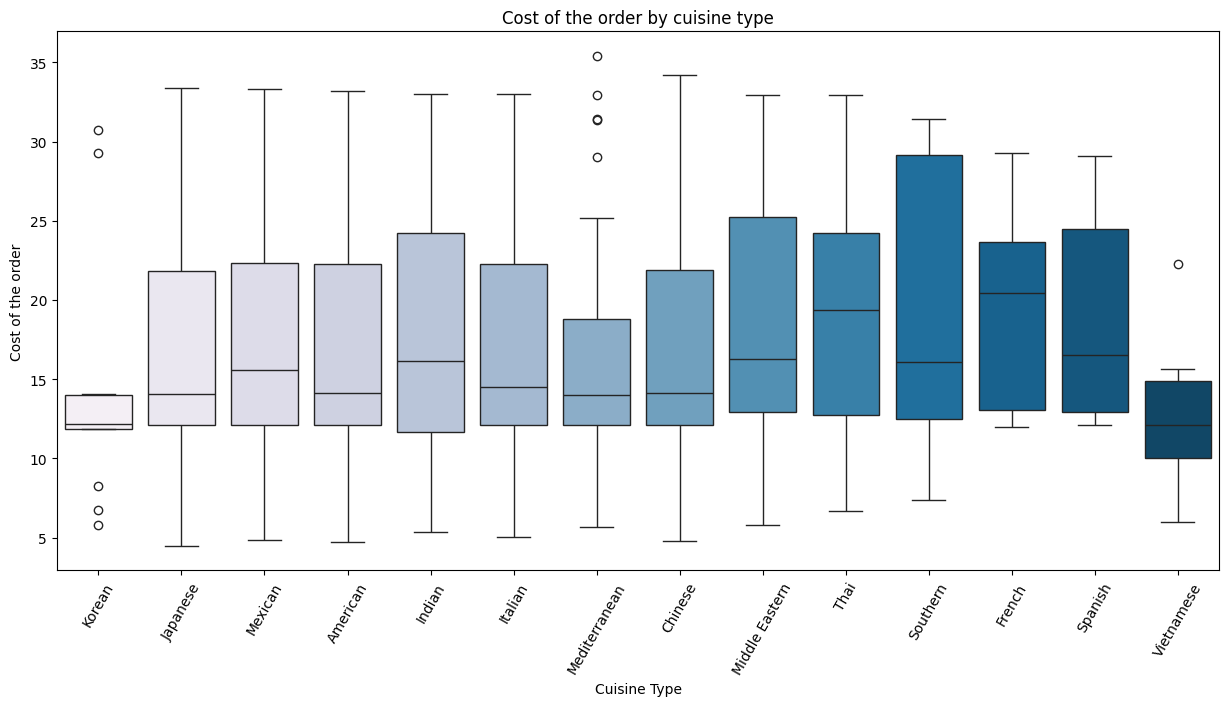

In [65]:
# Relationship between cost of the order and cuisine type

# Create a boxplot of cost_of_the_order grouped by cuisine_type
plt.figure(figsize=(15,7))
sns.boxplot(x="cuisine_type", y="cost_of_the_order", data=data, palette='PuBu', hue="cuisine_type")

# Rotate x-axis labels for better readability
plt.xticks(rotation=60)

# Add title and labels
plt.title("Cost of the order by cuisine type")
plt.xlabel("Cuisine Type")
plt.ylabel("Cost of the order")

# display the plot
plt.show()

**Top 5 expensive cusine types based on average of each cuisine type**

In [66]:
# The most expensive cusine types

# Calculate the average cost of the order for each cuisine type
avg_cost_by_cuisine = data.groupby('cuisine_type')['cost_of_the_order'].mean().sort_values(ascending=False)

# Print the top 5 most expensive order's cuisine types along with their average cost
print(f'The top 5 most expensive cuisine types are:\n {avg_cost_by_cuisine.head(5).to_frame(name="Average cost").reset_index()}\n\n')

The top 5 most expensive cuisine types are:
      cuisine_type  Average cost
0          French        19.794
1        Southern        19.301
2            Thai        19.208
3         Spanish        18.994
4  Middle Eastern        18.821




**The least expensive cusine types based on average of each cuisine type**



In [67]:
# The least expensive cusine types

# Print the least expensive order's cusine types along with their average cost
print(f'The top 5 most expensive cuisine types are:\n {avg_cost_by_cuisine.sort_values().head(5).to_frame(name="Average cost").reset_index()}\n\n')

The top 5 most expensive cuisine types are:
     cuisine_type  Average cost
0     Vietnamese        12.883
1         Korean        14.002
2  Mediterranean        15.475
3       Japanese        16.305
4        Chinese        16.305




**Bar plot cost of the order vs cuisine type**

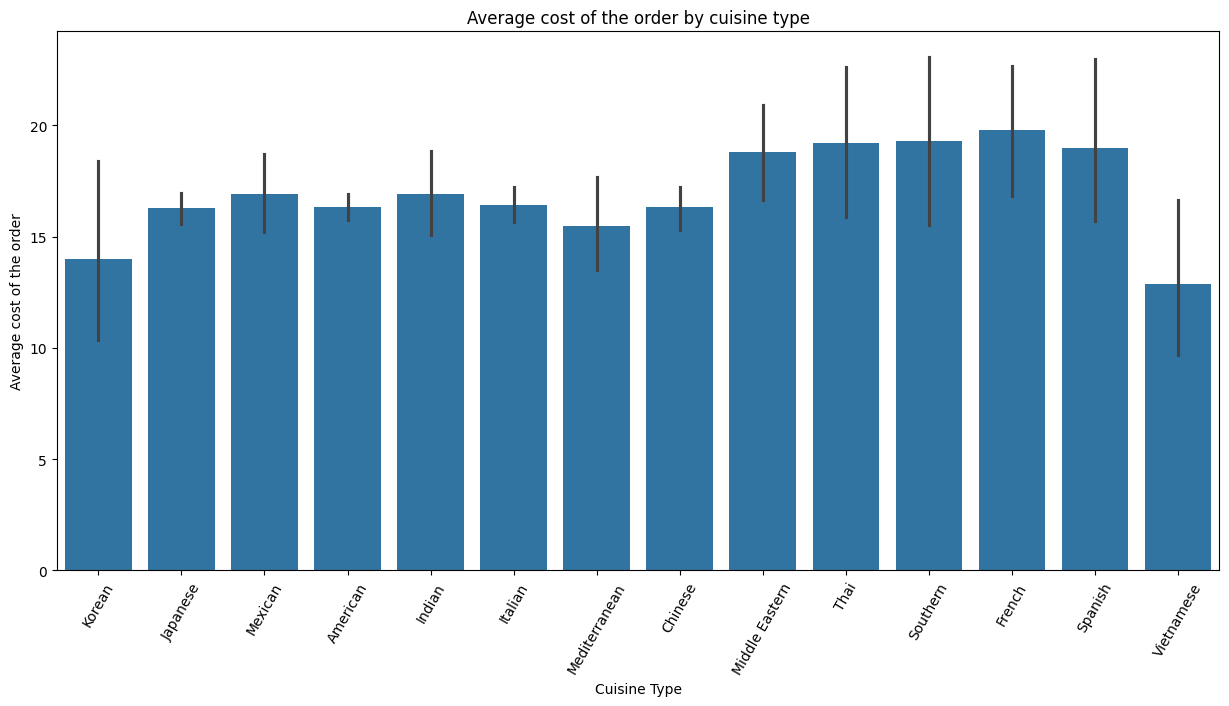

In [68]:
# bar plot cost_of_the_order vs cuisine type

# Create a bar plot of average cost_of_the_order by cuisine type
plt.figure(figsize=(15,7))
sns.barplot(x="cuisine_type", y="cost_of_the_order", data=data)

# Rotate x-axis labels for better readability
plt.xticks(rotation=60)

# Add title and labels
plt.title("Average cost of the order by cuisine type")
plt.xlabel("Cuisine Type")
plt.ylabel("Average cost of the order")

# display the plot
plt.show()


**Total Cost of Orders by Cuisine Type**

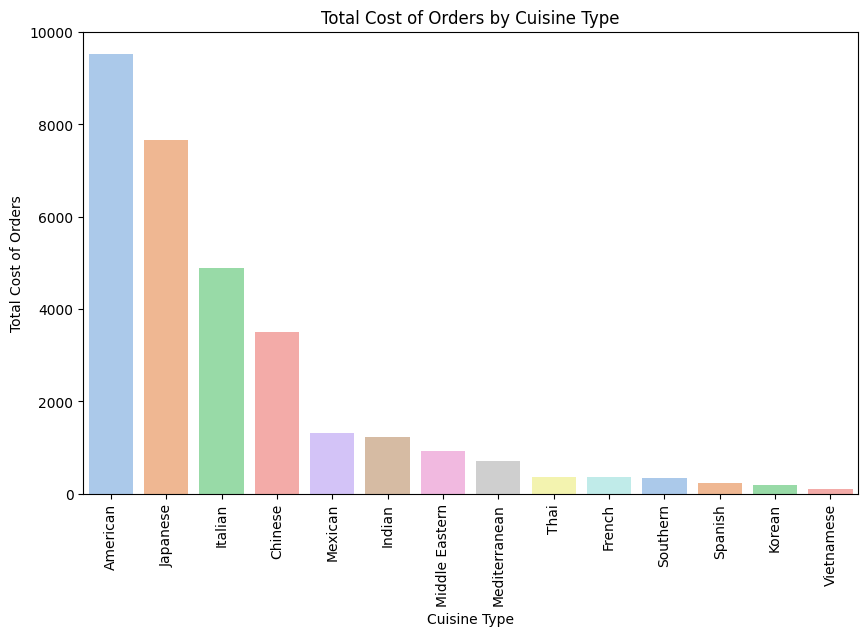

In [69]:
# Calculate the total cost of orders for each cuisine type and sort them in descending order
df_cusines_price = data.groupby('cuisine_type')['cost_of_the_order'].sum().sort_values(ascending=False).to_frame().reset_index()

# Set the size of the plot figure
plt.figure(figsize=(10, 6))

# Create a bar plot of total cost of orders for each cuisine type
sns.barplot(x='cuisine_type', y='cost_of_the_order',hue='cuisine_type', data=df_cusines_price, palette='pastel')

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=90)

# Set the labels and title
plt.xlabel('Cuisine Type')
plt.ylabel('Total Cost of Orders')
plt.title('Total Cost of Orders by Cuisine Type')

# Display the plot
plt.show()

##### Observations
- In `Korean` cusine we have `low` and `high` outliers.
- In `Mediterranean` cusine we hve `high` outliers.
- In `Vietnamese` cusine we have `high` outliers.
- The most expensivevcuisine type along with their average cost is `French`, followed by `Southern` and `Thai`.
- The least expensive cusine type along with their average cost is `Vietnamese` followed by `Korean` and `Mediterranean`.
- `American` has the biggest share on cost of all orders followed by `Japanese`, `Itlian` and `Chinese`

#### Cuisine vs Food Preparation time

**Relationship between food preparation time and cuisine type**

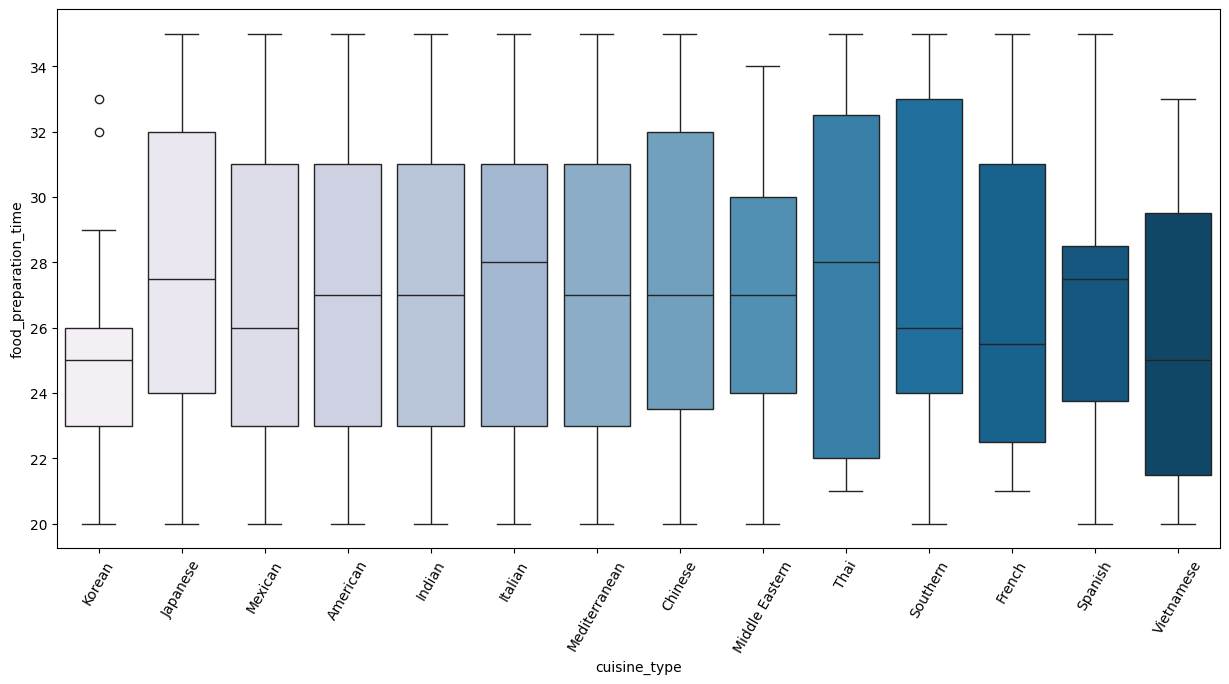

In [70]:
# Relationship between food preparation time and cuisine type

# Set the size of the plot figure
plt.figure(figsize=(15, 7))

# Create a box plot of food_preparation_time grouped by cuisine_type
sns.boxplot(data=data, x='cuisine_type', y='food_preparation_time', palette='PuBu', hue='cuisine_type')

# Rotate x-axis labels for better readability
plt.xticks(rotation=60)

# Display the plot
plt.show()


**bar plot food_preparation_time vs cuisine_type**

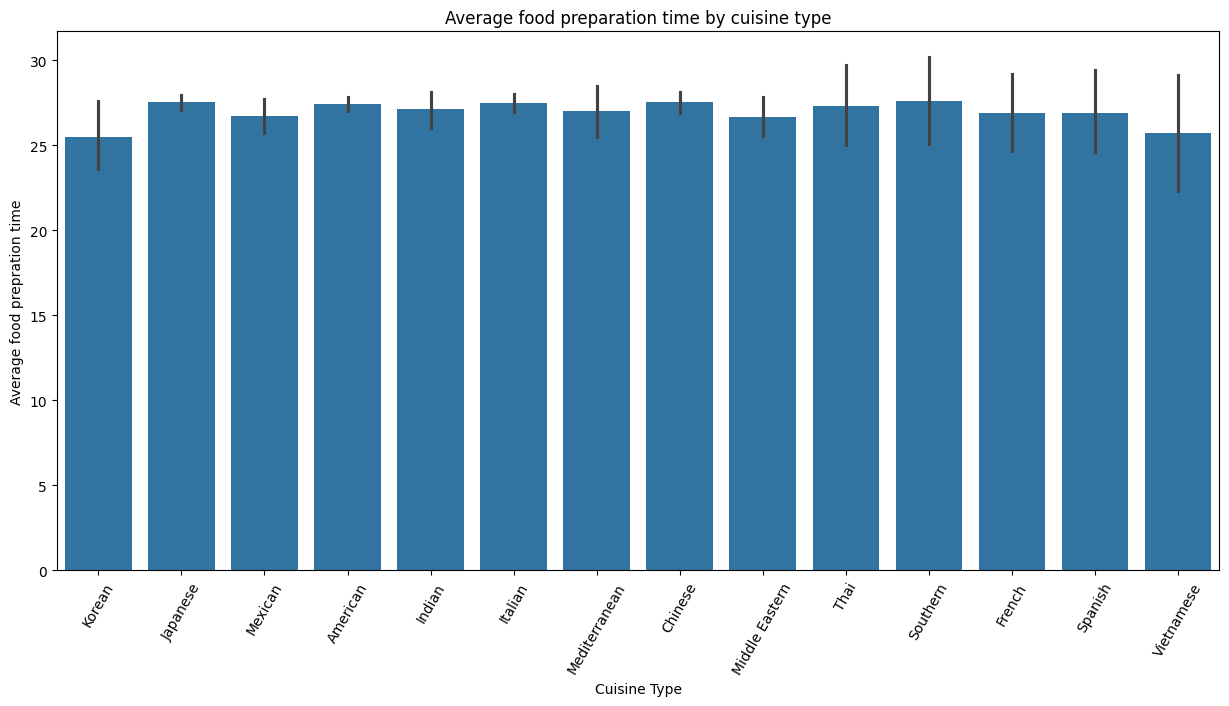

In [71]:
# bar plot food_preparation_time vs cuisine type

# Create a bar plot of average food_preparation_time by cuisine type
plt.figure(figsize=(15,7))
sns.barplot(x="cuisine_type", y="food_preparation_time", data=data)

# Rotate x-axis labels for better readability
plt.xticks(rotation=60)

# Add title and labels
plt.title("Average food preparation time by cuisine type")
plt.xlabel("Cuisine Type")
plt.ylabel("Average food prepration time")

# display the plot
plt.show()

**The average time of prepration for each cusine type**

In [72]:
# Group the data by 'cuisine_type' and calculate the mean food_preparation_time for each cuisine type
food_preparation_time_by_cuisine = data.groupby('cuisine_type')['food_preparation_time'].mean()

# Sort the average preparation times in descending order
food_preparation_time_by_cuisine_sorted = food_preparation_time_by_cuisine.sort_values(ascending=False)

# Print the top five cuisine types with their average food preparation times
print(food_preparation_time_by_cuisine_sorted.to_frame(name="Average food preparation time").reset_index())

      cuisine_type  Average food preparation time
0         Southern                         27.588
1          Chinese                         27.512
2         Japanese                         27.511
3          Italian                         27.483
4         American                         27.440
5             Thai                         27.316
6           Indian                         27.110
7    Mediterranean                         27.000
8          Spanish                         26.917
9           French                         26.889
10         Mexican                         26.727
11  Middle Eastern                         26.673
12      Vietnamese                         25.714
13          Korean                         25.462


##### Observations
- In `Korean` cusine we have `high` outliers.
- The average of cusine types are too close.

####Cusine vs Rating

**Rating of each cusine type**

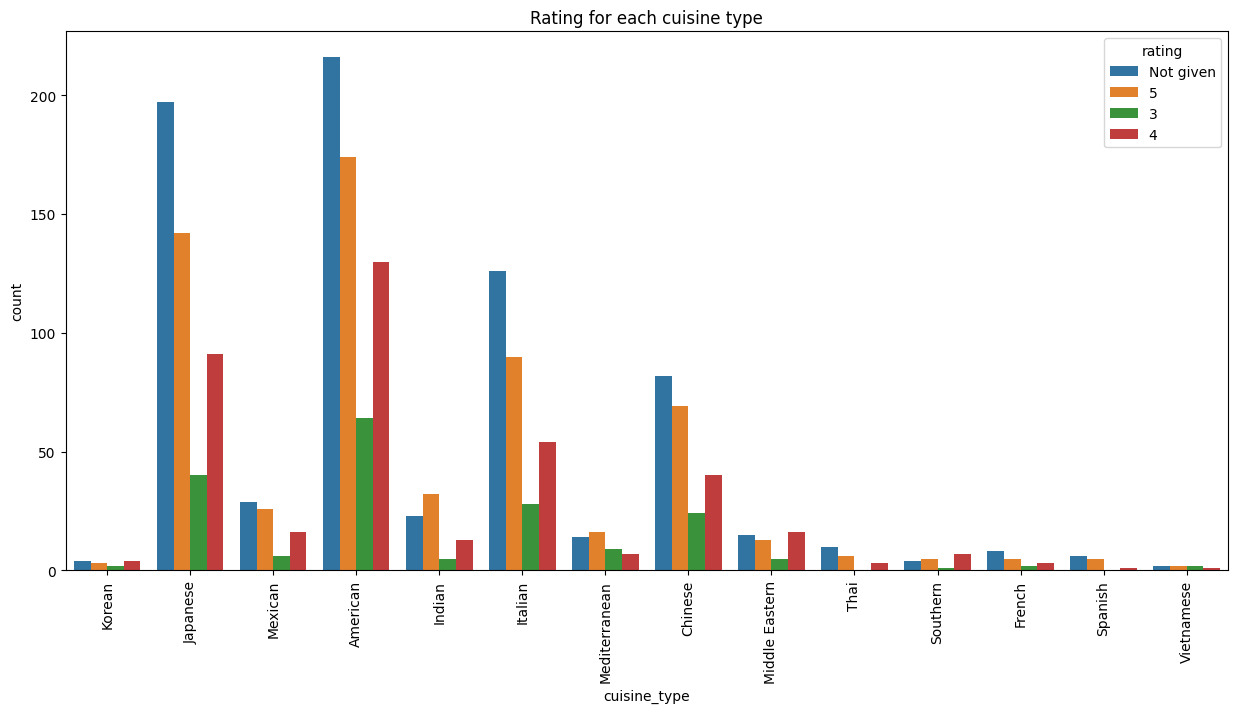

In [73]:
# Set the size of the plot figure
plt.figure(figsize=(15, 7))

# Create a count plot of cuisine_type with rating as hue
ax= sns.countplot(data=data, x='cuisine_type', hue='rating')

# Set the title of the plot
plt.title('Rating for each cuisine type')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

**Percent of rates that are "Not given" compare to rated for each cuisine**

In [74]:
# Count the number of 'Not given' ratings for each cuisine type
not_rated_cuisines = data.groupby('cuisine_type')['rating'].apply(lambda x: (x=='Not given').sum()).to_frame(name='Count of Not given').reset_index()

# Count the total number of ratings for each cuisine type
count_rating_each_cuisine = data.groupby('cuisine_type')['rating'].count().to_frame(name='Count').reset_index()

# Merge the two dataframes on 'cuisine_type' to combine the counts of 'Not given' ratings and total ratings
df_percent_of_each_cuisine = not_rated_cuisines.merge(count_rating_each_cuisine, on='cuisine_type')

# Calculate the percentage of 'Not given' ratings to total ratings for each cuisine type
df_percent_of_each_cuisine['Percent of not rated to rated'] = (df_percent_of_each_cuisine['Count of Not given'] / df_percent_of_each_cuisine['Count']) * 100

# Print the dataframe showing the percentage of unrated orders for each cuisine type
print(df_percent_of_each_cuisine.sort_values(by='Count', ascending=False))


      cuisine_type  Count of Not given  Count  Percent of not rated to rated
0         American                 216    584                         36.986
5         Japanese                 197    470                         41.915
4          Italian                 126    298                         42.282
1          Chinese                  82    215                         38.140
8          Mexican                  29     77                         37.662
3           Indian                  23     73                         31.507
9   Middle Eastern                  15     49                         30.612
7    Mediterranean                  14     46                         30.435
12            Thai                  10     19                         52.632
2           French                   8     18                         44.444
10        Southern                   4     17                         23.529
6           Korean                   4     13                         30.769

**Percent of all rates**

In [75]:
# Count the occurrences of each unique rating value and normalize by the total number of ratings
rating_distribution = data['rating'].value_counts(normalize=True)

# Print the relative frequency (proportion) of each unique rating value
print(rating_distribution)

rating
Not given   0.388
5           0.310
4           0.203
3           0.099
Name: proportion, dtype: float64


**Top rated cusines based on average of ratings**



In [76]:
# Instead of 'rating', 'rating_numerical' is used to calculate the mean
# Calculate the average numerical rating for each cuisine type and rename the resulting column to 'Average rating'
df_cuisine_rating_avg = data.groupby('cuisine_type')['rating_numerical'].agg('mean').to_frame(name='Average rating').reset_index()

# Sort the DataFrame by 'Average rating' in descending order to find the cuisines with the highest average ratings
df_cuisine_rating_avg_sorted = df_cuisine_rating_avg.sort_values(by='Average rating', ascending=False)

# print average rating of each cuisine type
print(df_cuisine_rating_avg_sorted)

      cuisine_type  Average rating
11         Spanish           4.833
12            Thai           4.667
3           Indian           4.540
8          Mexican           4.417
5         Japanese           4.374
4          Italian           4.360
1          Chinese           4.338
10        Southern           4.308
2           French           4.300
0         American           4.299
9   Middle Eastern           4.235
7    Mediterranean           4.219
6           Korean           4.111
13      Vietnamese           4.000


**Plot of op rated cusines based on average of ratings**

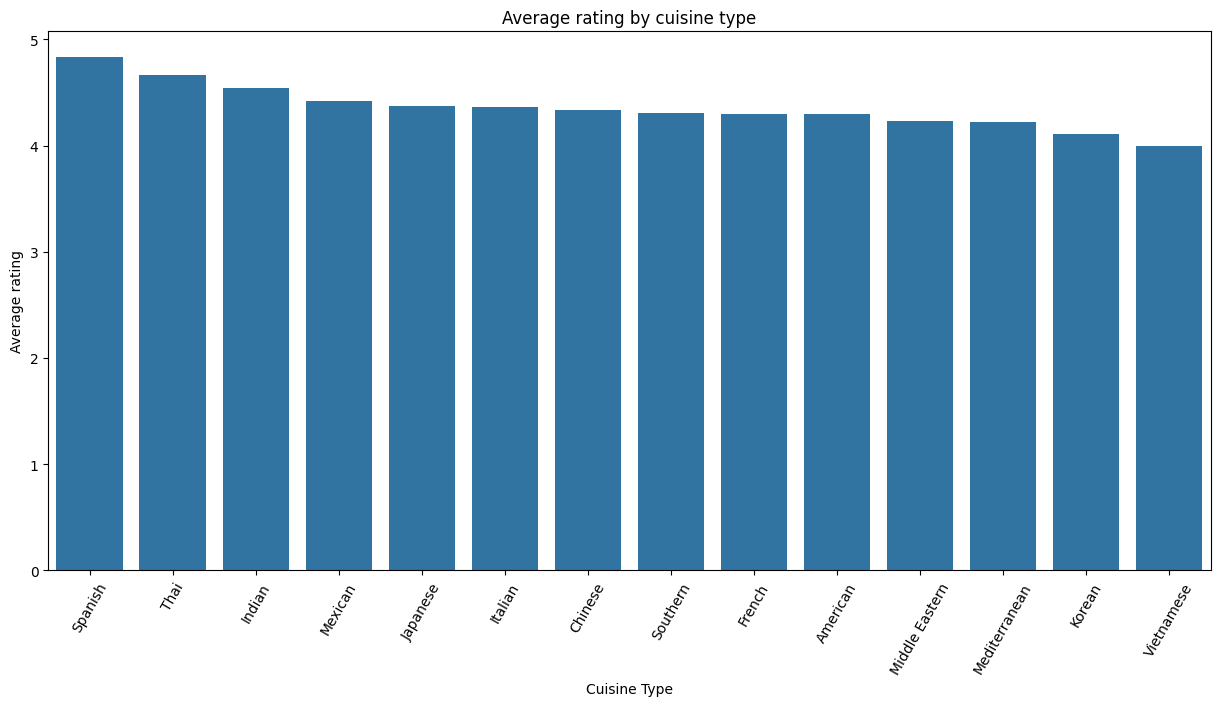

In [77]:
# Set the size of the plot figure
plt.figure(figsize=(15, 7))

# Create a bar plot of average rating by cuisine type
sns.barplot(x="cuisine_type", y="Average rating", data=df_cuisine_rating_avg_sorted)

# Rotate x-axis labels for better readability
plt.xticks(rotation=60)

# Set the title, x-axis label, and y-axis label of the plot
plt.title("Average rating by cuisine type")
plt.xlabel("Cuisine Type")
plt.ylabel("Average rating")

# Display the plot
plt.show()


#####Observations
- In the `rating` column the top rating is `Not given` with `38%` followed by `5` with `31%` and then `4` with `20%` and the least one is `3` with `9%`
- Based on average of ratings with ommiting the Not given, `Spanish` cuisine has the top average with with average of `4.8` followed by `Thai` with average of `4.6`
- Among the cuisines `Thai` with `52%` has the highest `Not given` rate compare to all the ratings it has followed by `Spanish` with `50%`

####Cuisine vs Day of the week

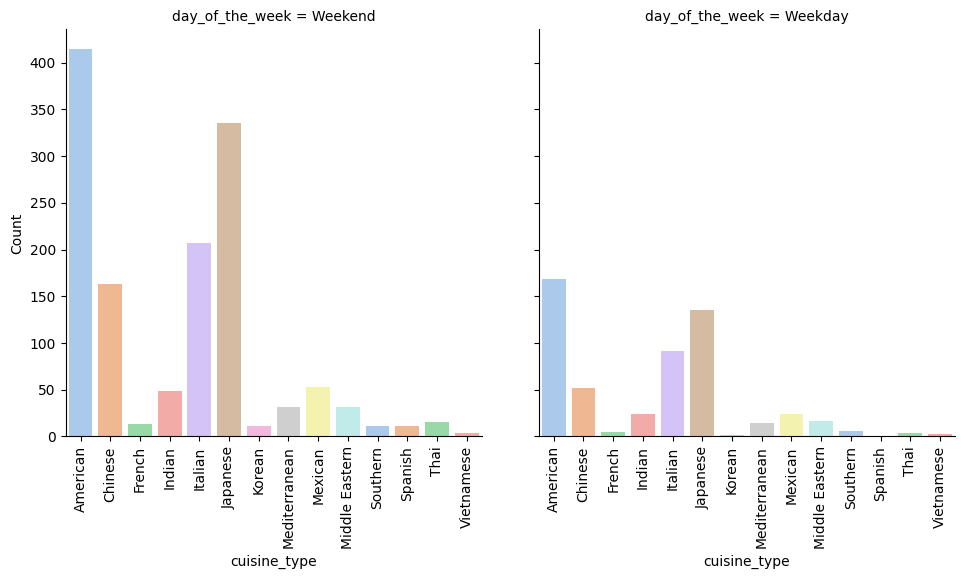

In [78]:
# Group the data by 'cuisine_type' and 'day_of_the_week', then count the occurrences of each combination
week_day_count = data.groupby('cuisine_type')['day_of_the_week'].value_counts().to_frame(name='Count').reset_index()

# Create a categorical plot (catplot) using Seaborn
ax = sns.catplot(data=week_day_count, x="cuisine_type", y="Count", col="day_of_the_week", hue='cuisine_type', kind='bar', palette='pastel')

# Rotate x-axis tick labels for better readability
ax.set_xticklabels(rotation=90)

# Display the plot
plt.show()

#####Observations
- The most popular cusine types in `weekends` is `American` followed by `Japanese` and `Italian` and then `Chinese`
- The most popular cusine types in `weekdays` is `American` followed by `Japanese` and `Italian` and then `Chinese`


####Cusine Type vs Delivery Time

**Delivery time based on each cuisine box plot**

**Relationship between food preparation time and cuisine type**

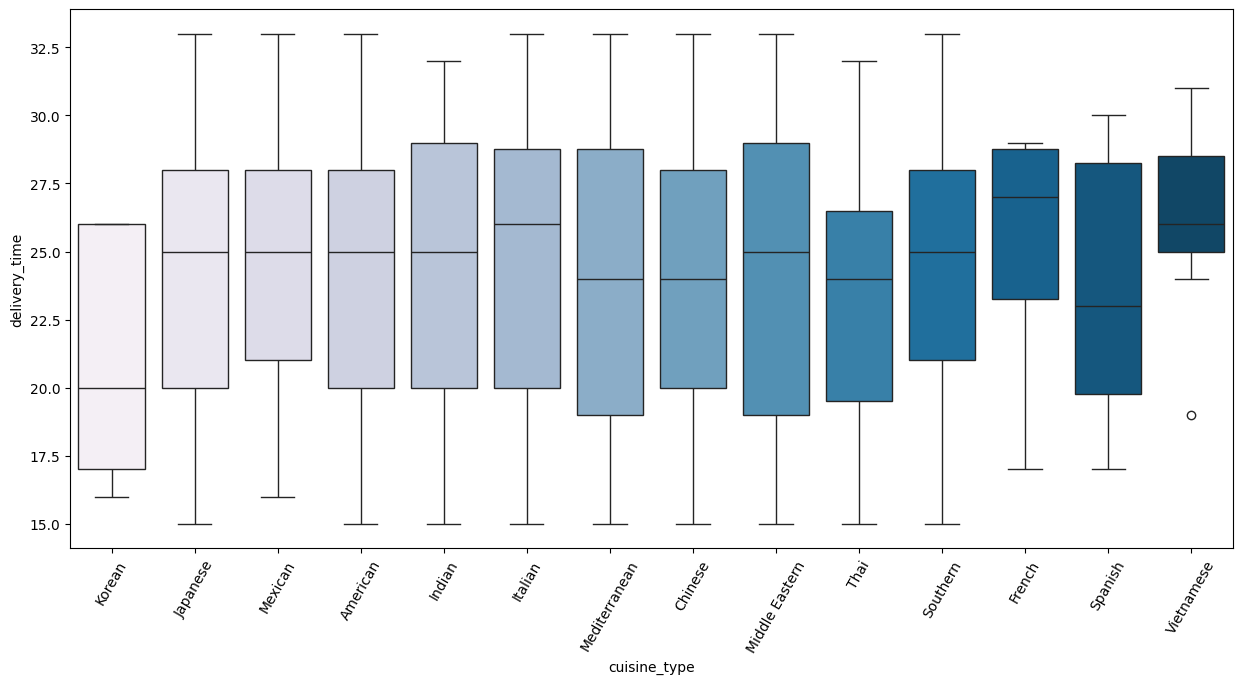

In [79]:
# Relationship between food preparation time and cuisine type

# Set the size of the plot figure
plt.figure(figsize=(15, 7))

# Create a box plot of delivery_time grouped by cuisine_type
sns.boxplot(data=data, x='cuisine_type', y='delivery_time', palette='PuBu', hue='cuisine_type')

# Rotate x-axis labels for better readability
plt.xticks(rotation=60)

# Display the plot
plt.show()

**Bar plot delivery_time vs cuisine type**

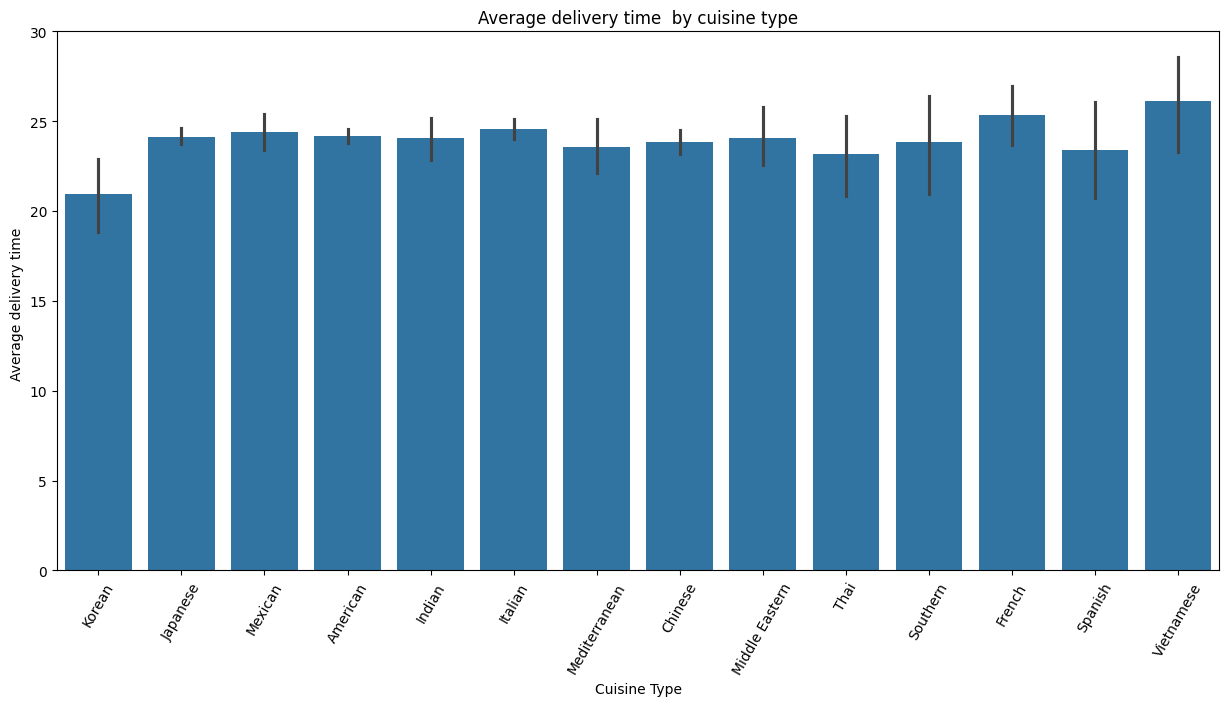

In [80]:
# bar plot delivery_time vs cuisine type

# Create a bar plot of average delivery_time  by cuisine type
plt.figure(figsize=(15,7))
sns.barplot(x="cuisine_type", y="delivery_time", data=data)

# Rotate x-axis labels for better readability
plt.xticks(rotation=60)

# Add title and labels
plt.title("Average delivery time  by cuisine type")
plt.xlabel("Cuisine Type")
plt.ylabel("Average delivery time ")

# display the plot
plt.show()

**Average delivery_time for each cuisine_type**

In [81]:
# Group the data by 'cuisine_type' and calculate the mean delivery_time for each cuisine type
delivery_time_by_cuisine = data.groupby('cuisine_type')['delivery_time'].mean()

# Sort the average preparation times in descending order
delivery_time_by_cuisine_sorted = delivery_time_by_cuisine.sort_values(ascending=False)

# Print the top five cuisine types with their average delivery time
print(delivery_time_by_cuisine_sorted.to_frame(name="Average delivery_time").reset_index())

      cuisine_type  Average delivery_time
0       Vietnamese                 26.143
1           French                 25.333
2          Italian                 24.567
3          Mexican                 24.390
4         American                 24.193
5         Japanese                 24.132
6           Indian                 24.082
7   Middle Eastern                 24.082
8          Chinese                 23.856
9         Southern                 23.824
10   Mediterranean                 23.587
11         Spanish                 23.417
12            Thai                 23.158
13          Korean                 20.923


##### Observations
- In `Vietnamese ` cusine we have `low` outliers.
- The averages on delivery time are too close.

#### Day of the Week vs Delivery time

**Relationship between day of the week and delivery time**

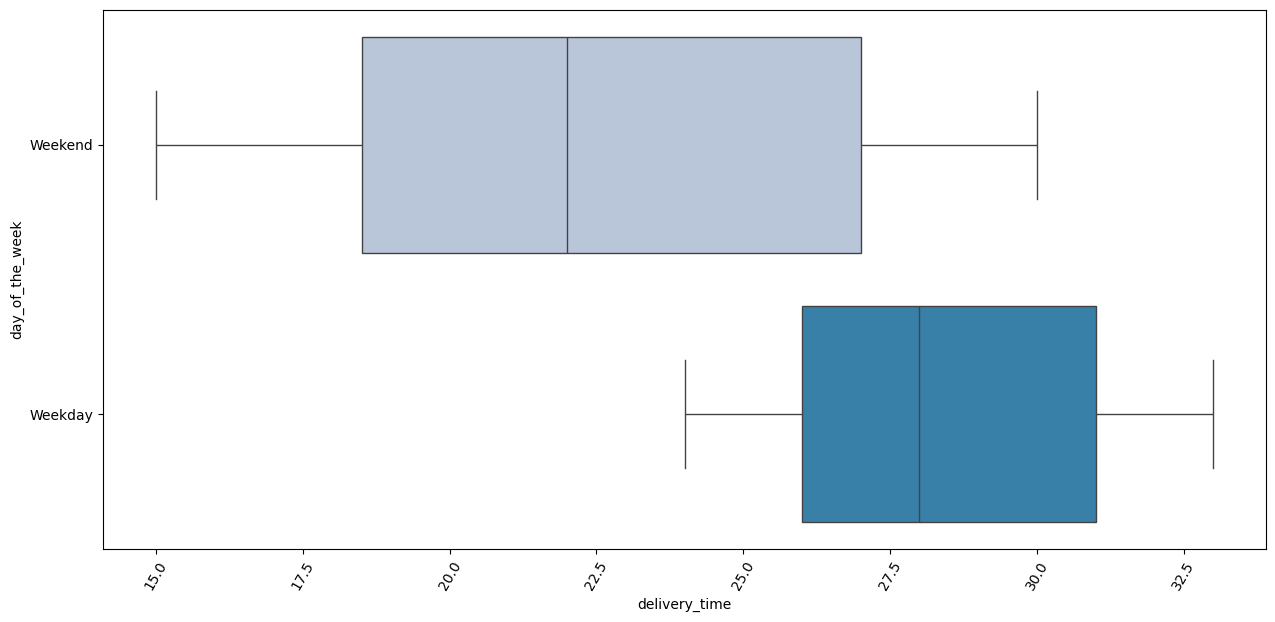

In [82]:
# Relationship between day of the week and delivery time
# Set the size of the plot figure
plt.figure(figsize=(15, 7))

# Create a box plot of delivery_time grouped by day_of_the_week, with hue for further differentiation
sns.boxplot(data=data, y='day_of_the_week', x='delivery_time', palette='PuBu', hue='day_of_the_week')

# Rotate x-axis labels for better readability
plt.xticks(rotation=60)

# Display the plot
plt.show()

**Average delivery time for weekdays ans weekends**

In [83]:
# Group the data by 'day_of_the_week' and calculate the mean delivery time for each day
average_delivery_time_by_day = data.groupby('day_of_the_week')['delivery_time'].mean()

# Print the resulting Series
print(average_delivery_time_by_day)

day_of_the_week
Weekday   28.340
Weekend   22.470
Name: delivery_time, dtype: float64


**Count the occurrences of each unique value in the 'day_of_the_week' column**

In [84]:
# Count the occurrences of each unique value in the 'day_of_the_week' column
orders_by_day_of_week = data['day_of_the_week'].value_counts(normalize=True)

# Print the resulting Series
print(orders_by_day_of_week)

day_of_the_week
Weekend   0.712
Weekday   0.288
Name: proportion, dtype: float64


**Bar plot of average delivery time by day of the week**

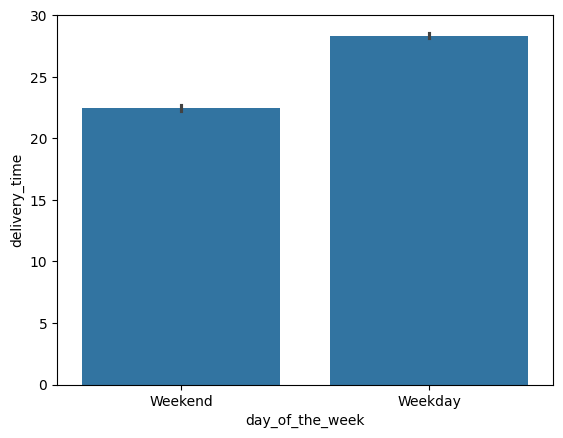

In [85]:
# Create a bar plot of average delivery time by day of the week
sns.barplot(x='day_of_the_week', y='delivery_time', data=data)

# Display the plot
plt.show()

#####Observations
- There is no outliers in delivery time vs day of the week
- `71%` of orders are placed in weekend however the average of delivery time on weekends is lower than this average for weekdays.
- Average delivery time for weekends is `22.470` and for weekdays is `28.340`

#### Revenue generated by the restaurants.

**Revenue genrated by 14 top resturants**

In [86]:
# Group the data by 'restaurant_name' and calculate the sum of the 'cost_of_the_order' for each restaurant
restaurant_revenue = data.groupby(['restaurant_name'])['cost_of_the_order'].sum()

# Sort the results in descending order based on revenue and select the top 14
top_14_restaurant_revenue = restaurant_revenue.sort_values(ascending=False).head(14)

# Convert the Series to a DataFrame and reset the index to make 'restaurant_name' a column again
top_14_restaurant_revenue_df = top_14_restaurant_revenue.to_frame(name='Revenue').reset_index()

# Rename the 'restaurant_name' column to 'Restaurant Name' for clarity
top_14_restaurant_revenue_df = top_14_restaurant_revenue_df.rename(columns={'restaurant_name':'Restaurant Name'})

# Print the DataFrame
print(top_14_restaurant_revenue_df)

# Calculate the percentage of revenue contributed by each restaurant
percentage_revenue = restaurant_revenue / restaurant_revenue.sum() * 100

# Sort the percentages in descending order and select the top 14
top_14_percentage_revenue = percentage_revenue.sort_values(ascending=False).head(14)

# Sum the percentages of the top 14 restaurants
sum_of_top_14_percentage_revenue = top_14_percentage_revenue.sum()

# Print the sum of the percentages of the top 14 restaurants
print(f"The sum of the percentages of the top 14 restaurants is {bold_begin}{sum_of_top_14_percentage_revenue:.2f}%{bold_end}")


                  Restaurant Name  Revenue
0                     Shake Shack 3579.530
1               The Meatball Shop 2145.210
2               Blue Ribbon Sushi 1903.950
3       Blue Ribbon Fried Chicken 1662.290
4                            Parm 1112.760
5                RedFarm Broadway  965.130
6                  RedFarm Hudson  921.210
7                             TAO  834.500
8                     Han Dynasty  755.290
9   Blue Ribbon Sushi Bar & Grill  666.620
10                       Rubirosa  660.450
11               Sushi of Gari 46  640.870
12                 Nobu Next Door  623.670
13    Five Guys Burgers and Fries  506.470
The sum of the percentages of the top 14 restaurants is 54.22%


**Plot of top 14 resturants**

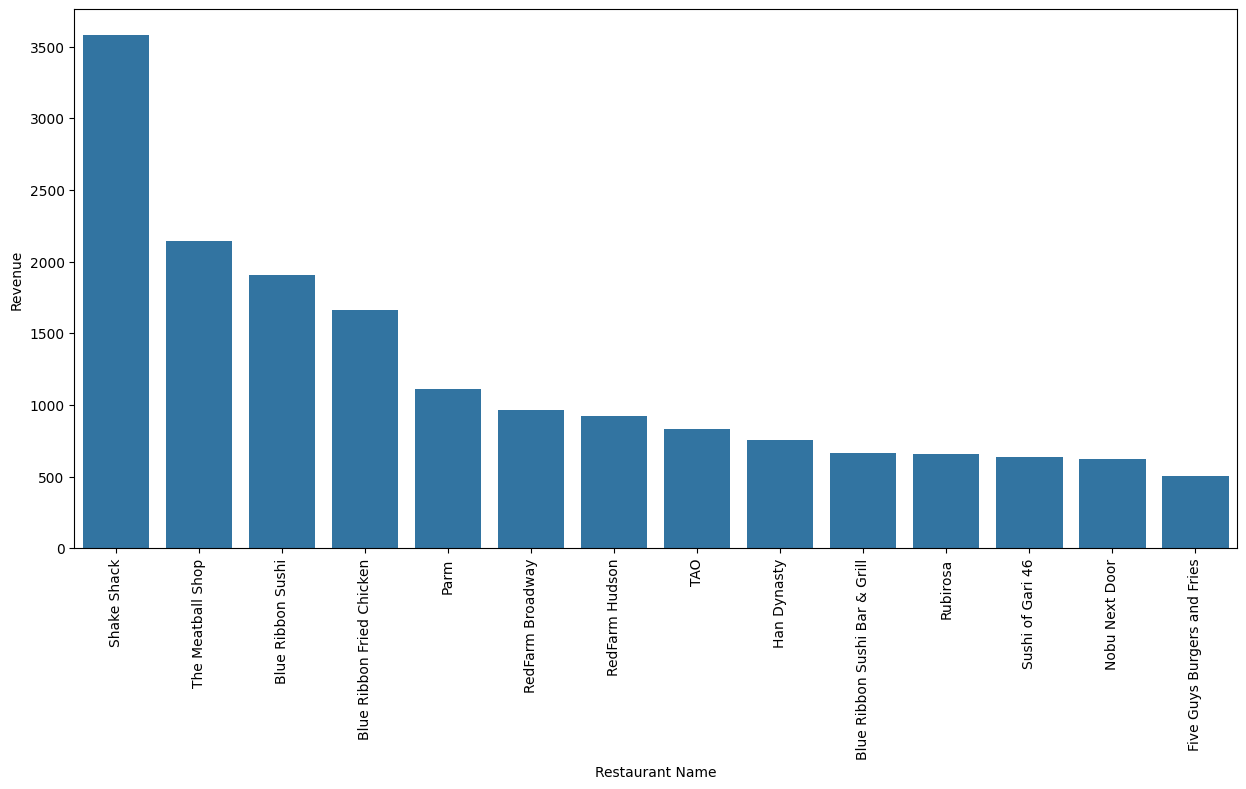

In [87]:
# Set the size of the plot figure
plt.figure(figsize=(15, 7))

# Create a bar plot of revenue by restaurant
sns.barplot(x='Restaurant Name', y='Revenue', data=top_14_restaurant_revenue_df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

#####Observations
- Top 14 resturants have the `54%` of the whole revenue amont the all resturants.


####Resturants vs Cuisine type

**Top 14 resturants based on number of orders by cuisine types**

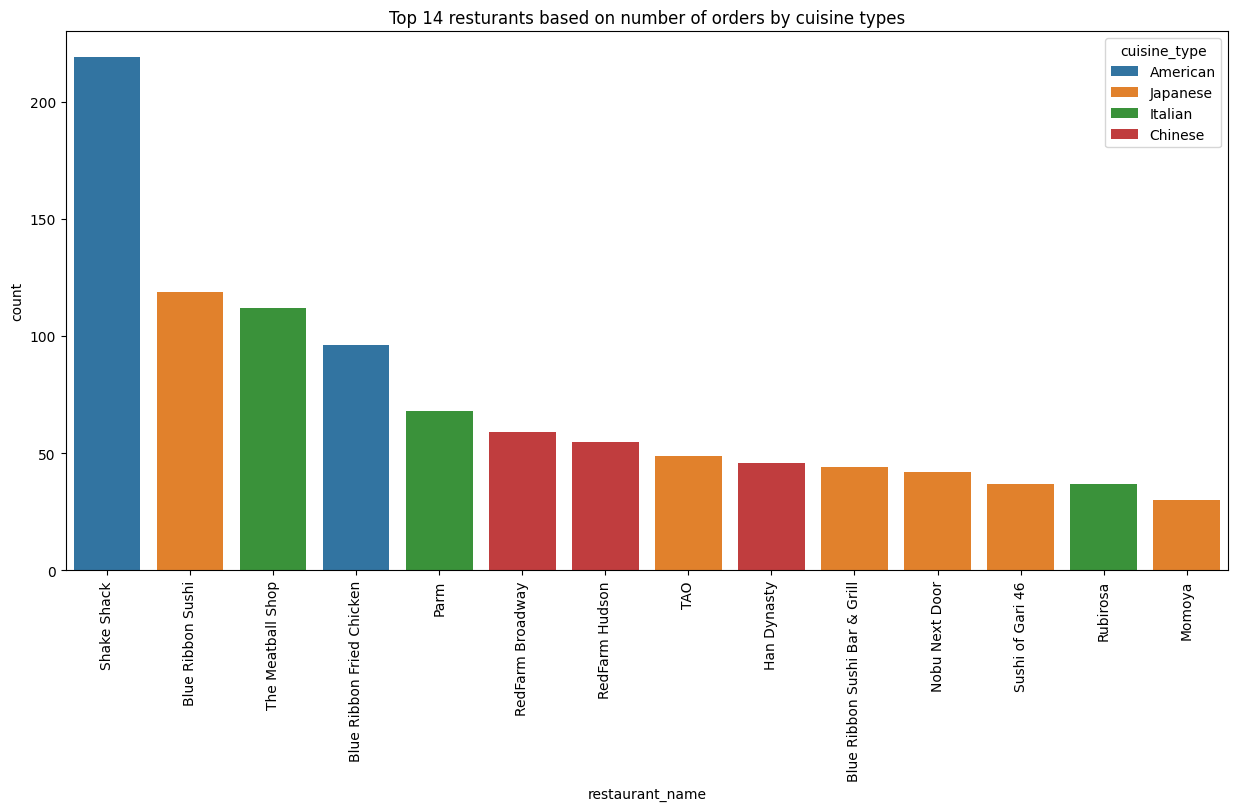

In [88]:

# Group the data by 'restaurant_name' and 'cuisine_type', then count the occurrences of each cuisine type for each restaurant
df_restaurant_cuisine = data.groupby(['restaurant_name', 'cuisine_type']).size().reset_index(name='count')

# Select the top 14 restaurants with the highest count of cuisine types
df_top_14_restaurant_cuisine = df_restaurant_cuisine.sort_values(by='count', ascending=False).head(14)

# Set the size of the plot figure
plt.figure(figsize=(15, 7))

# Create a bar plot of cuisine type counts for the top 14 restaurants, with hue for different cuisine types
sns.barplot(x='restaurant_name', y='count', hue='cuisine_type', data=df_top_14_restaurant_cuisine)

# Add a title to the plot
plt.title('Top 14 resturants based on number of orders by cuisine types')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

**Number of cusine types offer by each resturant**

In [89]:
# Create a new DataFrame with unique restaurant names and cuisine types
unique_restaurant_cuisine = data.drop_duplicates(subset=['restaurant_name', 'cuisine_type'])

# Group the data by 'restaurant_name' and count the number of unique cuisine types
restaurant_cuisine_count = unique_restaurant_cuisine.groupby('restaurant_name')['cuisine_type'].nunique()

# Group the data by 'restaurant_name' and name of unique cuisine types
restaurant_cuisine_name = unique_restaurant_cuisine.groupby('restaurant_name')['cuisine_type'].unique()

# Convert the Series to a DataFrame and reset the index
restaurant_cuisine_count_df = restaurant_cuisine_count.to_frame(name='Count of unique cuisine type').reset_index()

# Convert the Series to a DataFrame and reset the index
restaurant_cuisine_name_df = restaurant_cuisine_name.to_frame(name='Name of unique cuisine type').reset_index()

# Merge the two DataFrames on 'restaurant_name'
restaurant_cuisine_df = restaurant_cuisine_count_df.merge(restaurant_cuisine_name_df, on='restaurant_name')

# Print the DataFrame
restaurant_cuisine_df.sort_values(by='Count of unique cuisine type', ascending=False).head(14).reset_index(drop=True)


,restaurant_name,Count of unique cuisine type,Name of unique cuisine type
0,The Meatball Shop,2,"[Italian, American]"
1,'wichcraft,1,[American]
2,Pepe Rosso To Go,1,[Italian]
3,Piccolo Angolo,1,[Italian]
4,Pinto Nouveau Thai Bistro,1,[Thai]
5,Pongsri Thai,1,[Thai]
6,Posto,1,[Italian]
7,Prosperity Dumpling,1,[Chinese]
8,Pylos,1,[Mediterranean]
9,Ravagh Persian Grill,1,[Middle Eastern]


**Number of orders on each cuisine type in "The Meatball Shop" Restuarant**

In [90]:
# Filter the data for the restaurant 'The Meatball Shop' and count the occurrences of each cuisine type
cuisine_type_counts = data[data['restaurant_name'] == 'The Meatball Shop']['cuisine_type'].value_counts()

# Print the cuisine type counts
print(cuisine_type_counts)

cuisine_type
Italian     112
American     20
Name: count, dtype: int64


#####Observastions
- Top 14 restaurants based on the number of orders offer `American`, `Japanese`, `Italian` and `Chinese`.
- All of the restaurants except `The Meatball Shop` offers only one cuisine type.
- The `The Meatball Shop` offers two cuisine type, `Italian` with `112` orders and `American`	with `20` orders.

#### Rating vs Delivery time

**Rating vs Delivery time box plot**

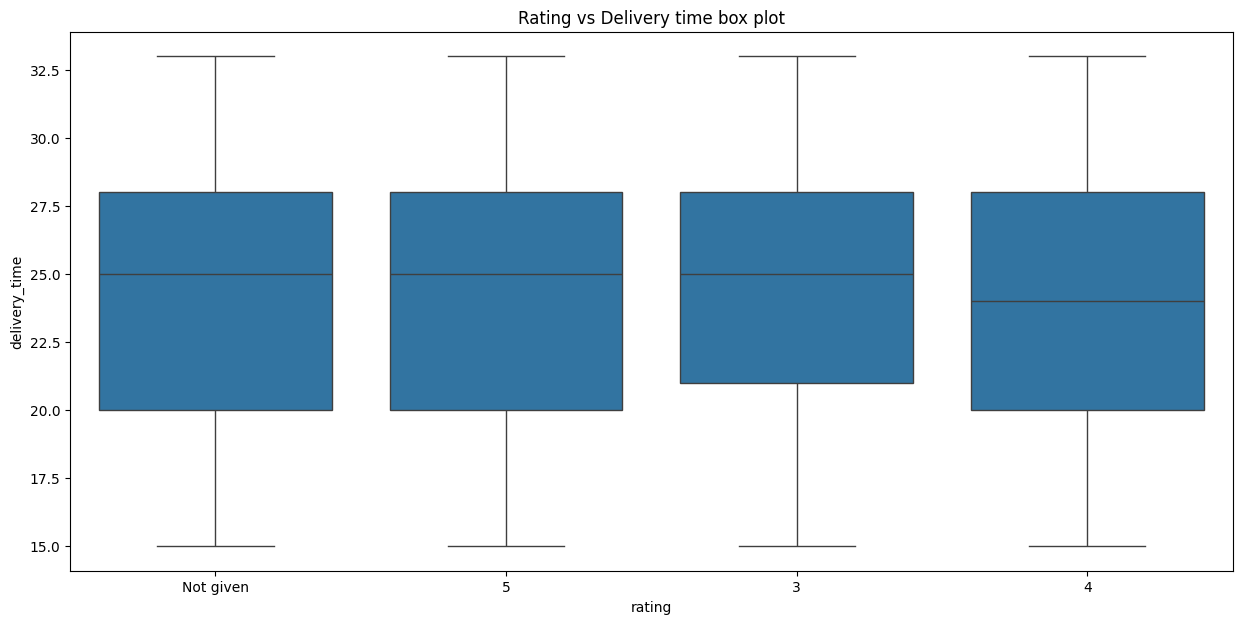

In [91]:
# Set the size of the plot figure
plt.figure(figsize=(15, 7))

# Create a box plot to visualize the distribution of delivery times for each rating
sns.boxplot(x='rating', y='delivery_time', data=data)

# Set title for the plot
plt.title('Rating vs Delivery time box plot')

# Display the plot
plt.show()

**Rating vs Delivery time point plot**

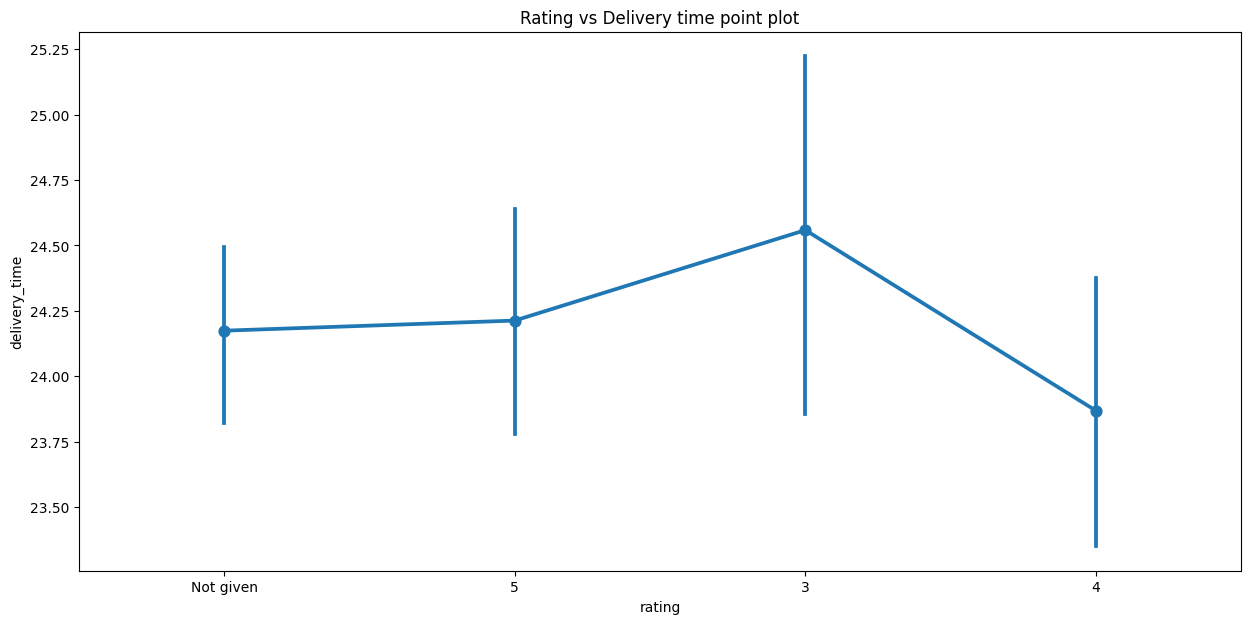

In [92]:
# Set the size of the plot figure
plt.figure(figsize=(15, 7))

# Create a point plot to visualize the relationship between ratings and delivery time
sns.pointplot(x='rating', y='delivery_time', data=data)

# Set title for the plot
plt.title('Rating vs Delivery time point plot')

# Display the plot
plt.show()

**bar plot delivery_time vs rating**

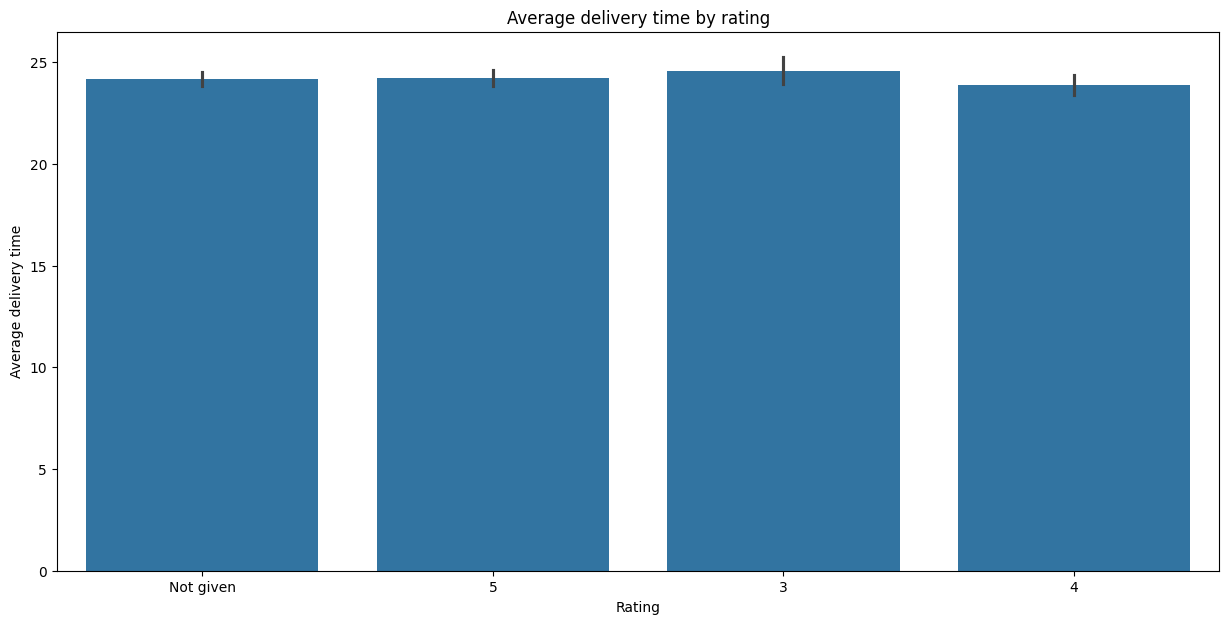

In [93]:
# bar plot delivery_time vs rating

# Create a bar plot of average food_preparation_time by rating
plt.figure(figsize=(15,7))
sns.barplot(x="rating", y="delivery_time", data=data)

# Add title and labels
plt.title("Average delivery time by rating")
plt.xlabel("Rating")
plt.ylabel("Average delivery time")

# display the plot
plt.show()

#####Observations
- Rating `3` has the highest delivery time average.
- Rating `4` has the lowest delivery time average.
- There is not a big difference for ratings affected by delivery time.
- There are no outliers.

#### Rating vs Food preparation time

**Rating vs Food preparation time box plot**

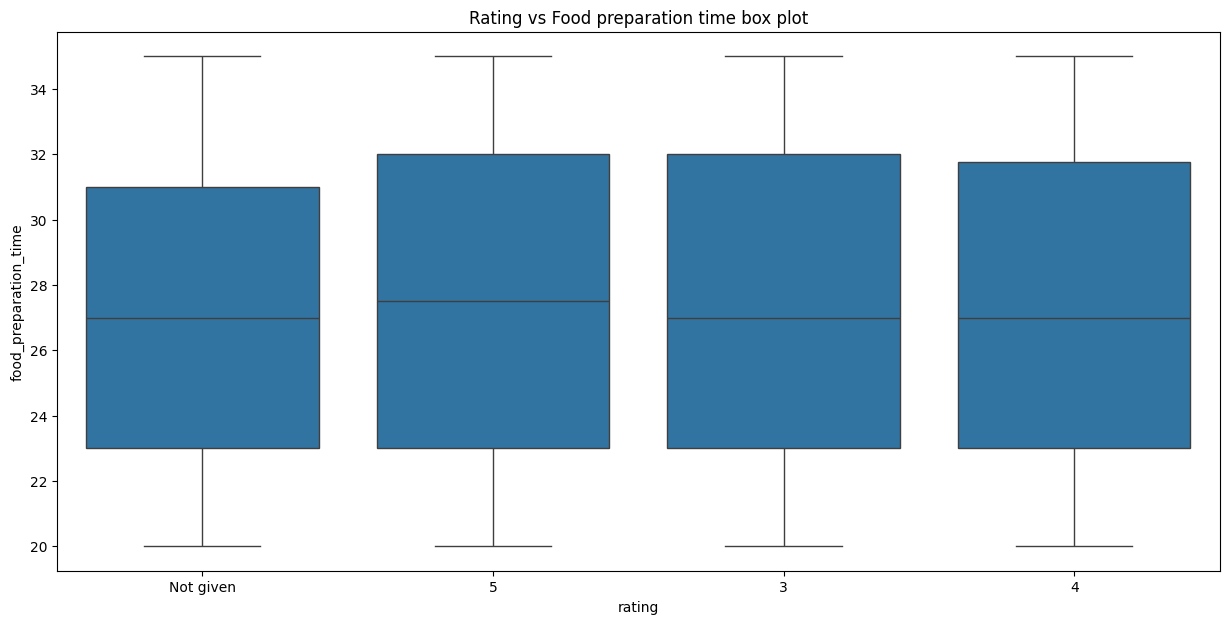

In [94]:
# Set the size of the plot figure
plt.figure(figsize=(15, 7))

# Create a box plot to visualize the distribution of food preparation time for each rating
sns.boxplot(x='rating', y='food_preparation_time', data=data)

# Set the title of the plot
plt.title('Rating vs Food preparation time box plot')

# Display the plot
plt.show()

**Relationship between rating and food preparation time**

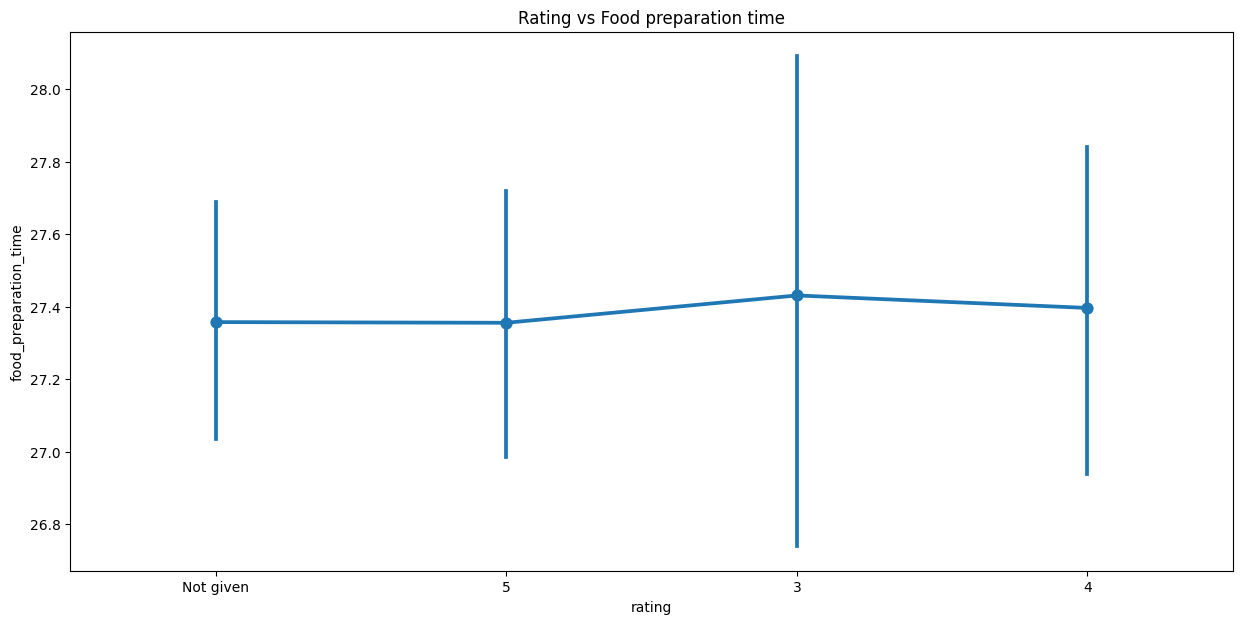

In [95]:
# Relationship between rating and food preparation time

# Set the size of the figure
plt.figure(figsize=(15, 7))

# Create a point plot with 'rating' on the x-axis and 'food_preparation_time' on the y-axis
sns.pointplot(x='rating', y='food_preparation_time', data=data)

plt.title('Rating vs Food preparation time')

# Display the plot
plt.show()

**Bar plot delivery_time vs rating**

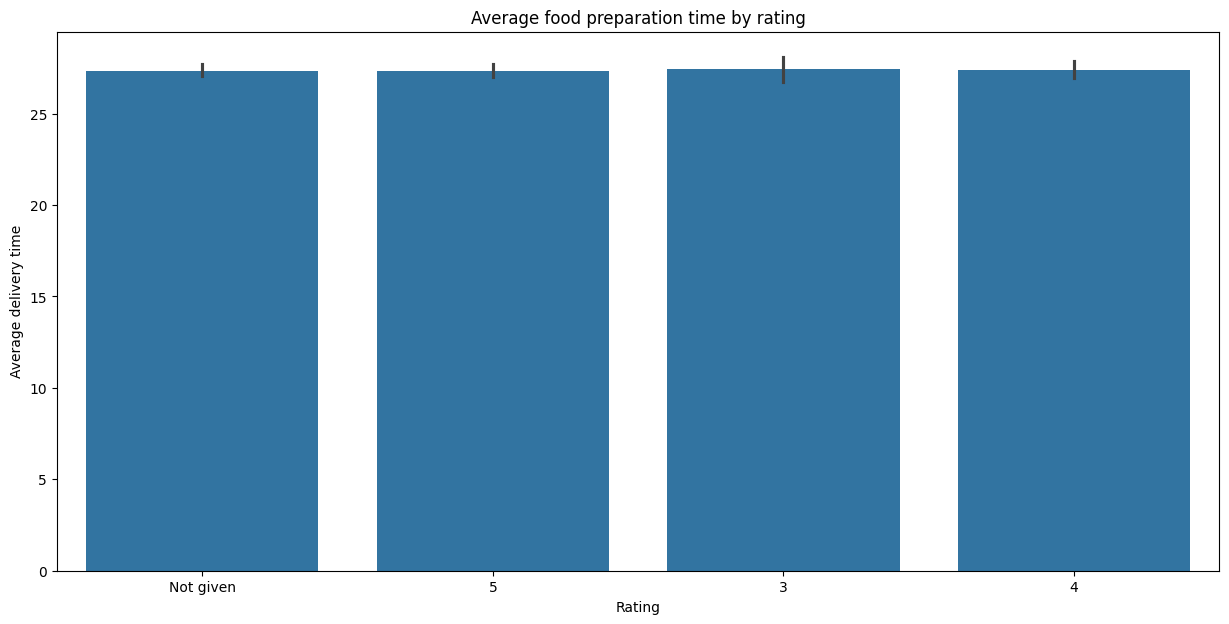

In [96]:
# bar plot delivery_time vs rating

# Create a bar plot of average food_preparation_time by rating
plt.figure(figsize=(15,7))
sns.barplot(x="rating", y="food_preparation_time", data=data)

# Add title and labels
plt.title("Average food preparation time by rating")
plt.xlabel("Rating")
plt.ylabel("Average delivery time")

# display the plot
plt.show()

**Average food preparation time for each rating category**

In [97]:
# Group the data by 'rating' and calculate the mean food preparation time for each rating category
rating_food_preparation_time_mean = data.groupby('rating')['food_preparation_time'].mean()

# Print the resulting Series
print(rating_food_preparation_time_mean.sort_values())

rating
5           27.355
Not given   27.357
4           27.396
3           27.431
Name: food_preparation_time, dtype: float64


#####Observations
- Rating `3` has the highest food prepration time average.
- Rating `5` has the lowest food prepration average.
- There is not a big difference for ratings affected by delivery time.
- There are no outliers.

#### Rating vs Cost of the order

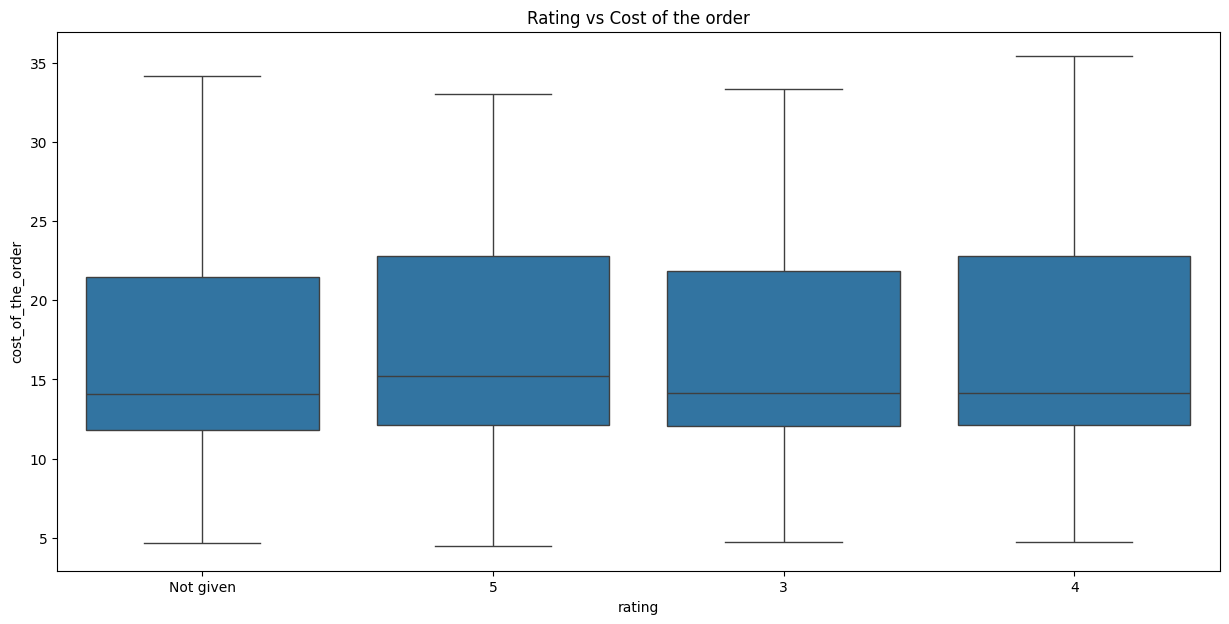

In [98]:
# Set the size of the figure
plt.figure(figsize=(15, 7))

# Create a box plot with 'rating' on the x-axis and 'cost_of_the_order' on the y-axis
sns.boxplot(x='rating', y='cost_of_the_order', data=data)

# Set the title of the plot
plt.title('Rating vs Cost of the order')

# Display the plot
plt.show()

**Relationship between rating and cost of the order**

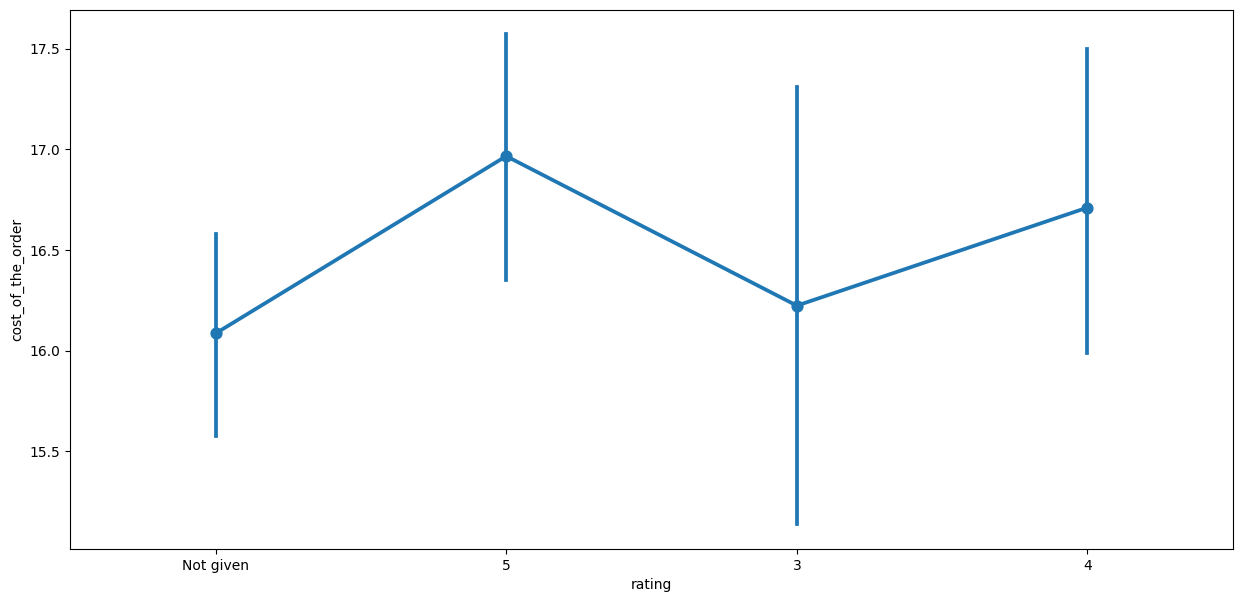

In [99]:
# Relationship between rating and cost of the order

# Set the size of the plot figure
plt.figure(figsize=(15, 7))

# Create a point plot to visualize the relationship between rating and the cost of the order
sns.pointplot(x='rating', y='cost_of_the_order', data=data)

# Display the plot
plt.show()

**bar plot cost_of_the_order vs rating**

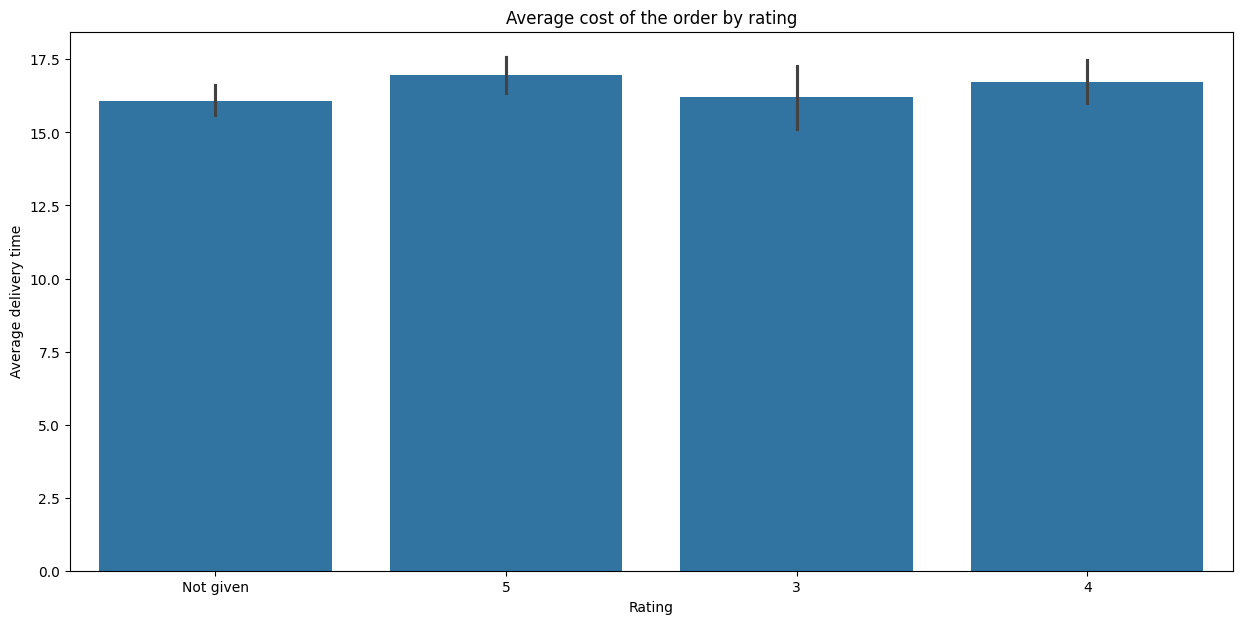

In [100]:
# bar plot cost_of_the_order vs rating

# Create a bar plot of average cost_of_the_order by rating
plt.figure(figsize=(15,7))
sns.barplot(x="rating", y="cost_of_the_order", data=data)

# Add title and labels
plt.title("Average cost of the order by rating")
plt.xlabel("Rating")
plt.ylabel("Average delivery time")

# display the plot
plt.show()

**Average of cost_of_the_order for each rating category**

In [101]:
# Group the data by 'rating' and calculate the mean cost_of_the_order for each rating category
cost_of_the_order_mean = data.groupby('rating')['cost_of_the_order'].mean()

# Print the resulting Series
print(cost_of_the_order_mean.sort_values())

rating
Not given   16.085
3           16.223
4           16.710
5           16.966
Name: cost_of_the_order, dtype: float64


#####Observations
- Rating `5` has the highest cost average.
- Rating `Not given` has the lowest food prepration average.
- There is not a big difference for ratings affected by delivery time.
- There are no outliers.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

**The below code is using the rating_numerical without treatment on rating**

In [102]:
# Group the data by 'restaurant_name' and calculate both the count and mean rating_numerical for each restaurant
rest_ratings = data.groupby('restaurant_name')['rating_numerical'].agg(['count', 'mean'])

# Sort the resulting DataFrame by 'count' in descending order to find restaurants with the highest number of ratings
rest_ratings = rest_ratings.sort_values(by='count', ascending=False)

# Reset the index to make 'restaurant_name' a regular column instead of an index
rest_ratings = rest_ratings.reset_index()

# Filter out restaurants with fewer than 50 ratings and an average rating score below 4
eligible_restaurants = rest_ratings[(rest_ratings['count'] > 50) & (rest_ratings['mean'] > 4)]

# Print the DataFrame containing eligible restaurants
print(eligible_restaurants)

             restaurant_name  count  mean
0                Shake Shack    133 4.278
1          The Meatball Shop     84 4.512
2          Blue Ribbon Sushi     73 4.219
3  Blue Ribbon Fried Chicken     64 4.328


**The below code is using the rating_numerical_treated on rating**

In [103]:
# Group the data by 'restaurant_name' and calculate both the count and mean rating_numerical for each restaurant
rest_ratings = data.groupby('restaurant_name')['rating_numerical_treated'].agg(['count', 'mean'])

# Sort the resulting DataFrame by 'count' in descending order to find restaurants with the highest number of ratings
rest_ratings = rest_ratings.sort_values(by='count', ascending=False)

# Reset the index to make 'restaurant_name' a regular column instead of an index
rest_ratings = rest_ratings.reset_index()

# Filter out restaurants with fewer than 50 ratings and an average rating score below 4
eligible_restaurants = rest_ratings[(rest_ratings['count'] > 50) & (rest_ratings['mean'] > 4)]

# Print the DataFrame containing eligible restaurants
print(eligible_restaurants)

             restaurant_name  count  mean
0                Shake Shack    219 4.278
1          The Meatball Shop    132 4.512
2          Blue Ribbon Sushi    119 4.219
3  Blue Ribbon Fried Chicken     96 4.328
4                       Parm     68 4.128
5           RedFarm Broadway     59 4.244
6             RedFarm Hudson     55 4.176


#### Observations:
- `Using rating_numerical`: There are `4` restaurants that filfilling the criterai. `Shake Shack`,  `The Meatball Shop`, `Blue Ribbon Sushi`, `Blue Ribbon Sushi` and `Blue Ribbon Fried Chicken`

- `Using rating_numerical_treated`: There are `7` restaurants that filfilling the criterai. `Shake Shack`,  `The Meatball Shop`, `Blue Ribbon Sushi`, `Blue Ribbon Sushi`, `Blue Ribbon Fried Chicken`, `Parm`, `RedFarm Broadway ` and `RedFarm Hudson`.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [104]:
# Define a function to calculate net revenue based on the cost of the order
def calculate_net_revenue(cost_of_the_order):
    if cost_of_the_order > 20:
        return cost_of_the_order * 0.25  # If cost is above $20, apply 25% revenue
    elif cost_of_the_order > 5:
        return cost_of_the_order * 0.15  # If cost is above $5 (and not above $20), apply 15% revenue
    else:
        return 0  # If cost is $5 or below, no revenue is generated

# Apply the calculate_net_revenue function to each row in the 'cost_of_the_order' column and store the result in a new column 'revenue'
data['revenue'] = data['cost_of_the_order'].apply(calculate_net_revenue)

# Print the number of orders that cost above $20 and the total revenue generated from them
print(f"There are {bold_begin}{data[data['cost_of_the_order']>20]['cost_of_the_order'].count()}{bold_end} orders that cost above $20 dollars and company makes {bold_begin}${data[data['cost_of_the_order']>20]['revenue'].sum():.2f}{bold_end} from them.")

# Print the number of orders that cost above $5 but less than or equal to $20 and the total revenue generated from them
print(f"There are {bold_begin}{data[(data['cost_of_the_order']>5 ) & (data['cost_of_the_order'] <=20)]['cost_of_the_order'].count()}{bold_end} orders that cost above $5 dollars and company makes {bold_begin}${data[(data['cost_of_the_order']>5 ) & (data['cost_of_the_order'] <=20)]['revenue'].sum():.2f}{bold_end} from them.")

# Print the number of orders that are less than $5 and the total revenue generated from them
print(f"There are {bold_begin}{data[data['cost_of_the_order']<5]['cost_of_the_order'].count()}{bold_end} orders that are less than $5 dollars and company makes no money from them.")

# Print the total net revenue generated by the company across all orders
print(f"The net revenue generated by the company across all orders is {bold_begin}${data['revenue'].sum():.2f}{bold_end}")


There are 555 orders that cost above $20 dollars and company makes $3688.73 from them.
There are 1334 orders that cost above $5 dollars and company makes $2477.58 from them.
There are 9 orders that are less than $5 dollars and company makes no money from them.
The net revenue generated by the company across all orders is $6166.30


#### Observations:
- The net revenue generated by the company across all orders is `$6166.30`

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [105]:
# Calculate the total time required for each order by adding food preparation time and delivery time
data['total_time_required'] = data['food_preparation_time'] + data['delivery_time']

# Calculate the percentage of orders that take more than 60 minutes to be delivered
percentage_above_60 = round(data[data['total_time_required'] > 60].shape[0] / data.shape[0] * 100, 2)

# Print the percentage of orders that take more than 60 minutes to be delivered
print(f"{bold_begin}{percentage_above_60}%{bold_end} of orders take more than 60 minutes to be delivered from the time the order is placed")


10.54% of orders take more than 60 minutes to be delivered from the time the order is placed


#### Observations:
- There are `10.54%` of orders take more than `60` minutes to be delivered from the time the order is placed

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [106]:
# Calculate the mean delivery time for orders placed on weekdays
weekday_delivery_time = data[data['day_of_the_week'].isin(['Weekday'])]['delivery_time'].mean()

# Calculate the mean delivery time for orders placed on weekends
weekend_delivery_time = data[data['day_of_the_week'].isin(['Weekend'])]['delivery_time'].mean()

# Print the mean delivery time for weekdays
print(f"The mean delivery time on weekdays is {weekday_delivery_time:.2f} minutes")

# Print the mean delivery time for weekends
print(f"The mean delivery time on weekends is {weekend_delivery_time:.2f} minutes")


The mean delivery time on weekdays is 28.34 minutes
The mean delivery time on weekends is 22.47 minutes


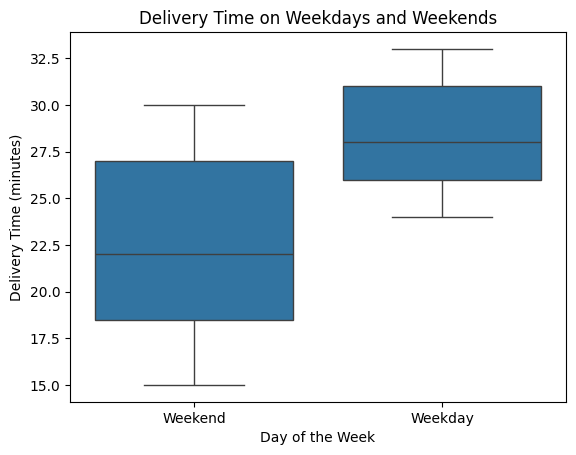

Mean delivery time on weekdays: 28.34 minutes
Mean delivery time on weekends: 22.47 minutes


In [107]:
# Create a boxplot of delivery time on weekdays and weekends
sns.boxplot(x="day_of_the_week", y="delivery_time", data=data)
plt.xlabel("Day of the Week")
plt.ylabel("Delivery Time (minutes)")
plt.title("Delivery Time on Weekdays and Weekends")
plt.show()

# Calculate the mean delivery time on weekdays and weekends
weekday_delivery_time = data[data["day_of_the_week"] == "Weekday"]["delivery_time"].mean()
weekend_delivery_time = data[data["day_of_the_week"] == "Weekend"]["delivery_time"].mean()

# Print the results
print(f"Mean delivery time on weekdays: {weekday_delivery_time:.2f} minutes")
print(f"Mean delivery time on weekends: {weekend_delivery_time:.2f} minutes")


#### Observations:
- The mean delivery time on `weekdays` is `28.34` minutes
- The mean delivery time on `weekends` is `22.47` minutes

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
- Dataset consists of `1898` rows and `9` columns displaying the various attributes related to each Order.
- The top `14` restaurants contribute `54%` of the total revenue.
- The top `5` restaurants are `Shake Shack`, `The Meatball Shop`, `Blue Ribbon Sushi`,  `Blue Ribbon Fried Chicken` and `Parm` and the contribute `33%` of the total revenue.
- `American`, `Japanese`, `Italian`, `Chinese` and `Mexican` are the top `5` most ordered cuisines.
- The `Meatball Shop` is the only restaurant that offers `multiple cuisine` types.
- There is no significant correlation between rating and delivery time or food preparation time.
- `7` restaurants meet the criteria for the promotional offer by using the `treated version of ratings` and `4` restaurants with the `not treated` version.
- There are `555` orders that cost above `$20` dollars and company makes `$3688.73` from them. There are `1334` orders that cost above `$5` dollars and company makes `$2477.58` from them. There are `9` orders that are less than `$5` dollars and company makes `no` money from them.
The net revenue generated by the company across all orders is `$6166.30`
- `10.54%` of orders take more than `60` minutes to be delivered.
- The mean delivery time is slightly shorter on weekends compared to weekdays.
- According to the data, most of the users don't rate the order `(around39%)` and when we look at the order rate distribution it lacks the rates `0, 1 or 2` which might indicate that the costumers only rate good experiences.
- This rate problem is `serious` as the average rating metric for each restaurt has high bias and cannot be trusted.
- Didn't find any pattern between rating and other data, we can not conclude what make the rates high or low.
- The mean delivery time on `weekdays` is `28.34` minutes and the mean delivery time on `weekends` is `22.47` minutes.
- Top `3` user_ids that are going to get discount are :  `52832` with `13` orders, `47440` with `10` and `83287` with `9`.

### Recommendations:

#### `1. Optimize Restaurant Partnerships`
##### `Focus on Top Performers:`
Since the top 14 restaurants contribute 54% of the total revenue, focus on them and deepen the relationship. Negotiate with them for exclusive deals or premium placements on the platform.
##### `Expansion of Popular Cuisines:`
Increase the number of restaurants providing American, Japanese, Italian, Chinese, and Mexican cuisines because they are the most ordered. This can cater better to the demand.
#### `2. Enhance Rating System`
##### `Encourage More Ratings:`
Prompts and incentives, such as discounts on future orders, can be given to users for rating orders to gather comprehensive feedback.
##### `Improve Accuracy of Ratings:`
Since most users do not rate their bad experiences, consider implementing a simple rating mechanism, like thumbs up/thumbs down, alongside the detailed rating to capture more balanced feedback.
#### `3. Delivery Time Optimization`
##### `Address Long Delivery Times:`
Reduce the percentage of orders taking more than 60 minutes by optimizing routes of delivery, increasing delivery personnel during peak hours, and using real-time tracking to identify and solve bottlenecks.
##### `Weekend Strategy:`
Leverage the shorter mean delivery time during weekends by offering weekend-specific promotions to boost orders during these periods.
##### `4. Promotional Offers`
##### `Loyalty Programs:`
Develop a loyalty program to reward frequent customers with discounts, free delivery, or exclusive offers.
#### `5. Order Value Segmentation`
##### `Increase High-Value Orders:`
Focus marketing efforts on increasing high-value orders, which are more profitable. Consider bundle deals or premium menu items.
##### `Low-Value Order Management:`
For orders less than $5, either implement a minimum order value or introduce small delivery fees to ensure profitability.
#### `6. Analyze Customer Preferences and Patterns`
##### `Behavioral Insights:`
Uncover the reasons behind those orders where customers do not leave ratings and find a method of improving this experience. This would increase the chances of their leaving a rating.
#### `7. Operational Improvements`
##### `Improve Food Preparation Times:`
Work with restaurants in order to streamline their food preparation processes. The sharing of best practices and tools for increased efficiency can result in reduction in time and improvement of delivery times in general.
##### `Efficiency in Delivery Fleet:`
Improve the fleet management of delivery by using predictive analytics to anticipate demand and allocate drivers accordingly. This ensures faster delivery times and higher customer satisfaction.
#### `8. Customer Service Enhancement`
##### `Feedback Loop:`
Establish a strong feedback loop in which customer complaints and suggestions are listened to and quickly responded to, resulting in continuous service quality enhancement.
##### `Customer Support:`
Improve customer support for order issues to improve user satisfaction and enhance the likelihood of good ratings and repeat business.
#### `9. Marketing and Outreach`
#####`Targeted Marketing:`
Use the insights from the data to run targeted marketing campaigns directed at specific customer segments. Personalized promotions can increase engagement and order frequency significantly.
##### `Social Media Engagement:`
Increase social media engagement with popular restaurants, top-rated dishes, and customer testimonials. This will attract more users to the platform.


---